In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

Text(0, 0.5, 'Recovered Percent')

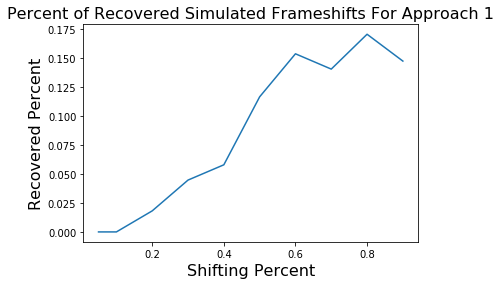

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import subplot


infoFile = open("bla_25_to_32_simulated_shifts_info", "r")

shift_percents_total = dict()
shift_info_dict = dict()
for line in infoFile:
    cs = line.strip().split(",")
    gene = cs[0]
    shift_start = int(cs[1])
    shift_end = int(cs[2])
    direction = int(cs[3])
    percent = float(cs[4])
    #if (percent == '0.9'):
    shift_info_dict[gene] = dict()
    shift_info_dict[gene]["shift_start"] = shift_start
    shift_info_dict[gene]["shift_end"] = shift_end
    shift_info_dict[gene]["direction"] = direction
    shift_info_dict[gene]["percent"] = percent
    if percent not in shift_percents_total:
        shift_percents_total[percent] = 0
    shift_percents_total[percent] += 1

infoFile.close()

inFile = open("output/bla_25_to_32_with_simulated_shifts_with_found_frameshifts", "r")
import numpy as np

p_value_dict = dict()
all_info_dict = dict()
shift_percents_found = dict()

for line in inFile:
    Info_string = line.strip()
    letters = inFile.readline().rstrip("\n").split(" ")
    reads_1 = inFile.readline().rstrip("\n").split(" ")
    reads_2 = inFile.readline().rstrip("\n").split(" ")
    percents = inFile.readline().rstrip("\n").split(",")
    percents = [float(x) for x in percents]
    blank = inFile.readline()
    gene_name = Info_string.split("\t")[0].split(" ")[1]
    p_value  = float(Info_string.split("\t")[1].split(" ")[1])
    p_value_dict[gene_name] = p_value
    all_info_dict[gene_name] = dict()
    all_info_dict[gene_name]["letters"] = letters
    all_info_dict[gene_name]["read_1"] = reads_1
    all_info_dict[gene_name]["read_2"] = reads_2
    all_info_dict[gene_name]["percents"] = percents
    all_info_dict[gene_name]["Info_string"] = Info_string

    if (gene_name in shift_info_dict):
        detected_shift = int(Info_string.split("\t")[3].split(" ")[1])
        detected_shift_end = detected_shift + int(Info_string.split("\t")[4].split(" ")[1])
        
        real_shift = shift_info_dict[gene_name]["shift_start"]
        real_shift_end = shift_info_dict[gene_name]["shift_end"]
        
        if (abs(detected_shift-real_shift) <= 30 and abs(detected_shift_end-real_shift_end) <= 30):
            percent = shift_info_dict[gene_name]["percent"]
            if percent not in shift_percents_found:
                shift_percents_found[percent] = 0
            shift_percents_found[percent] +=1 

inFile.close()

xs = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ys = []
for x in xs:
    if (x in shift_percents_found):
        ys.append(shift_percents_found[x]/shift_percents_total[x])
    else:
        ys.append(0.0)
import matplotlib.pyplot as plt
plt.plot(xs, ys)
plt.title('Percent of Recovered Simulated Frameshifts For Approach 1',fontsize=16)
plt.xlabel('Shifting Percent',fontsize=16)
plt.ylabel('Recovered Percent',fontsize=16)

# For Approach 1
## p-value threshold 1*10^-4
## 48 out of 587 simulated frameshifts recovered
## 26 other (including YIL009C-A and YOR239W) frameshifts found

In [33]:
print(len(shift_info_dict))
print(len(all_info_dict))
print(shift_percents_total)
print(shift_percents_found)

587
74
{0.05: 56, 0.3: 67, 0.7: 64, 0.2: 55, 0.1: 62, 0.9: 61, 0.4: 69, 0.5: 60, 0.8: 41, 0.6: 52}
{0.5: 7, 0.9: 9, 0.4: 4, 0.8: 7, 0.6: 8, 0.7: 9, 0.3: 3, 0.2: 1}


Gene: YBR159W	p-value: 1.3021697756726418e-13	gene-length: 1045	shift-start-position: 411	shift-length 124
Simulated Percent: 0.5


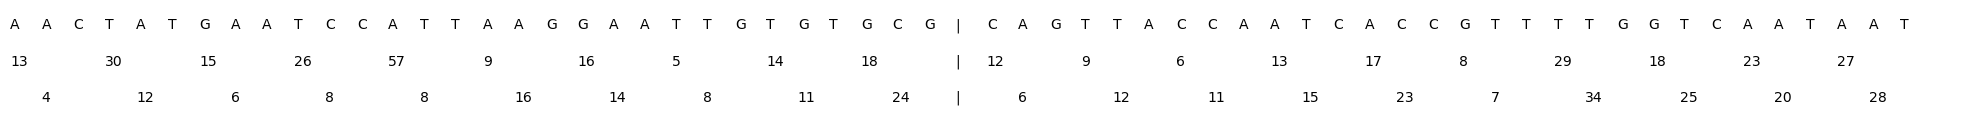

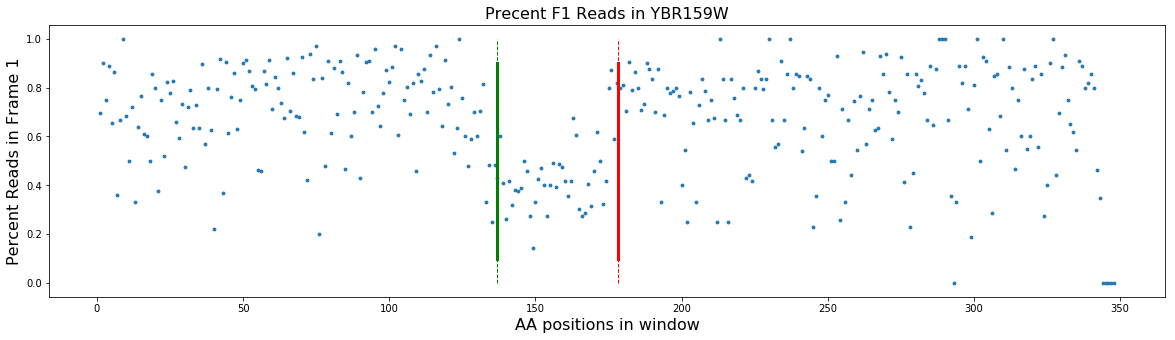


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YBR196C	p-value: 3.111028824631391e-15	gene-length: 1666	shift-start-position: 945	shift-length 158
Simulated Percent: 0.9


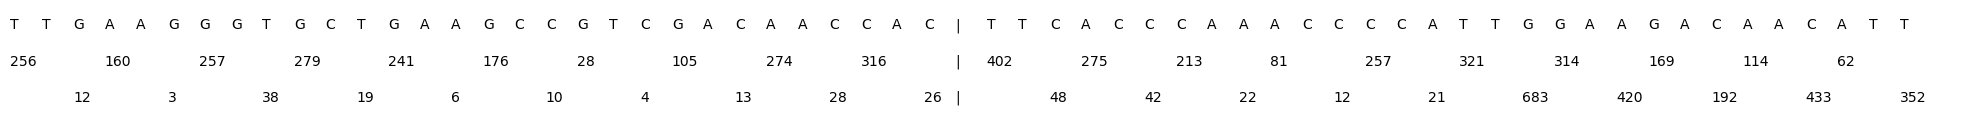

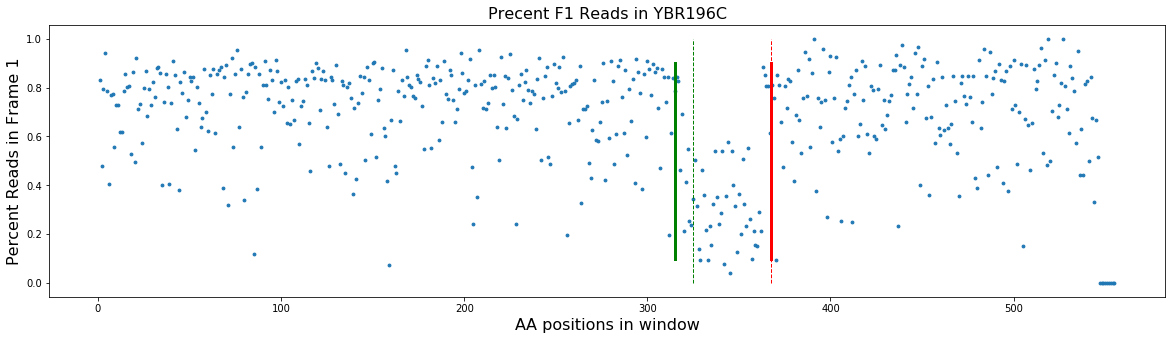


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDL192W	p-value: 4.126748048237088e-05	gene-length: 547	shift-start-position: 438	shift-length 79
Simulated Percent: 0.4


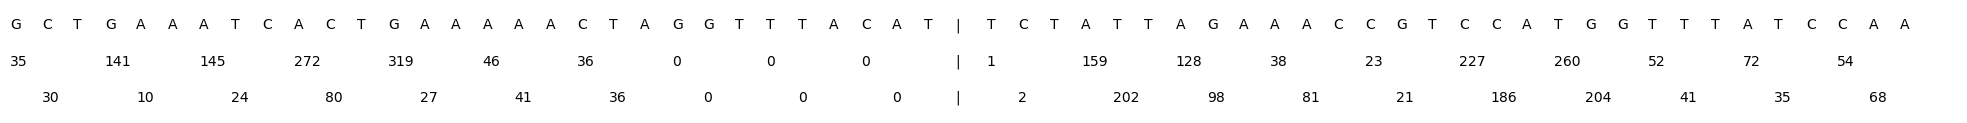

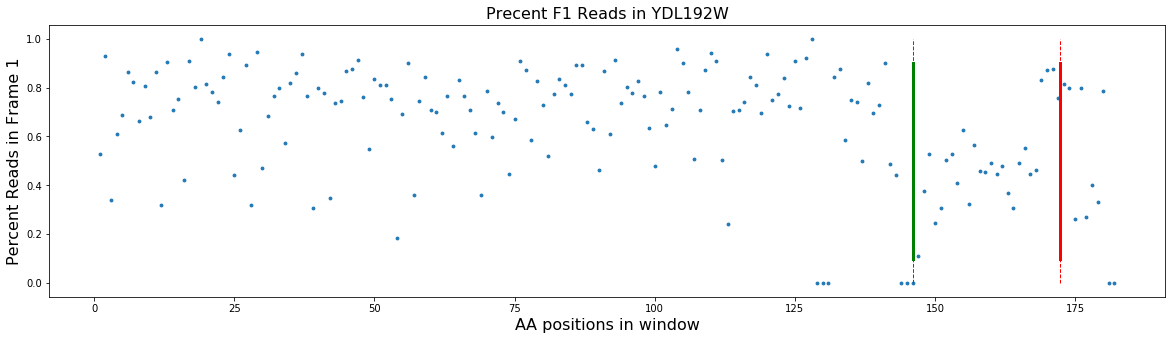


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDL097C	p-value: 2.4885648307028416e-14	gene-length: 1306	shift-start-position: 330	shift-length 143
Simulated Percent: 0.8


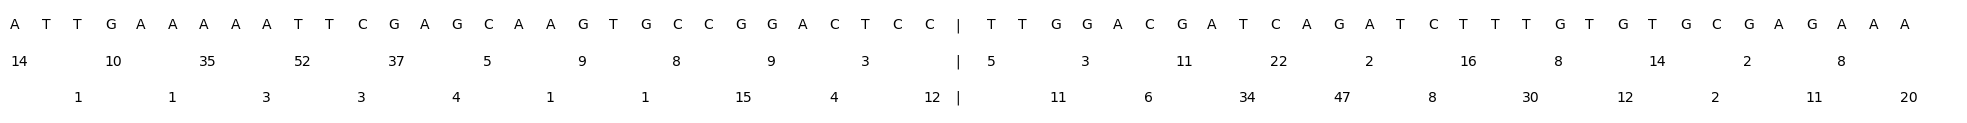

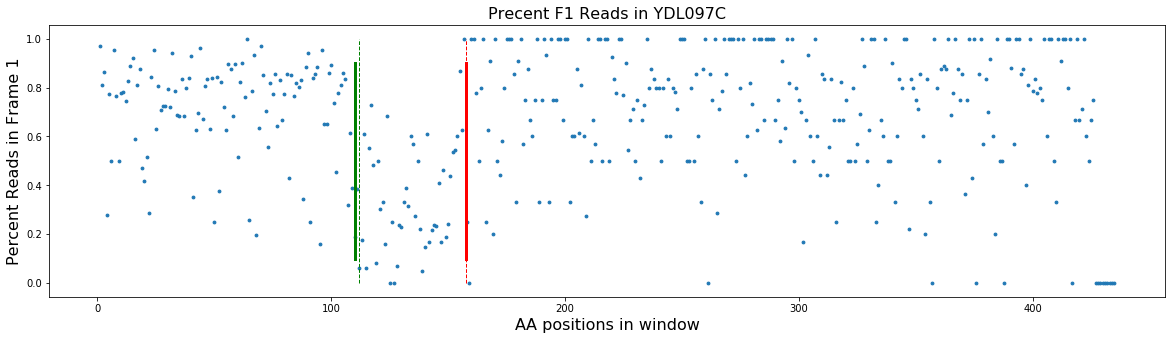


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDL081C	p-value: 1.3155012771927374e-08	gene-length: 322	shift-start-position: 93	shift-length 67
Simulated Percent: 0.6


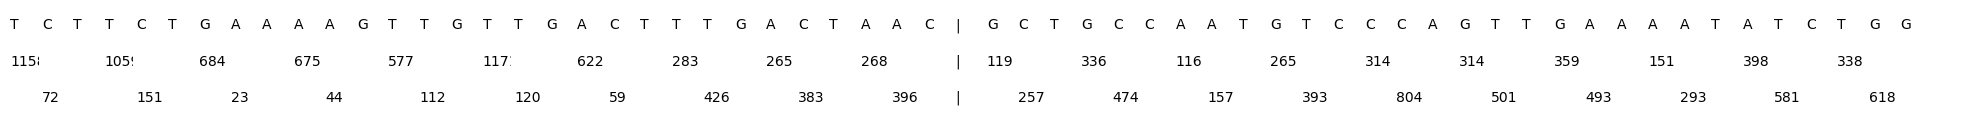

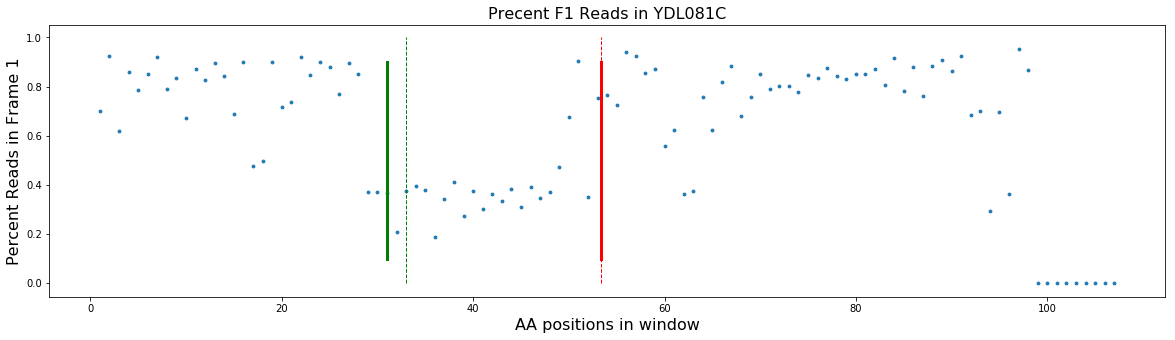


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR032C	p-value: 1.0888558132894173e-11	gene-length: 598	shift-start-position: 93	shift-length 103
Simulated Percent: 0.9


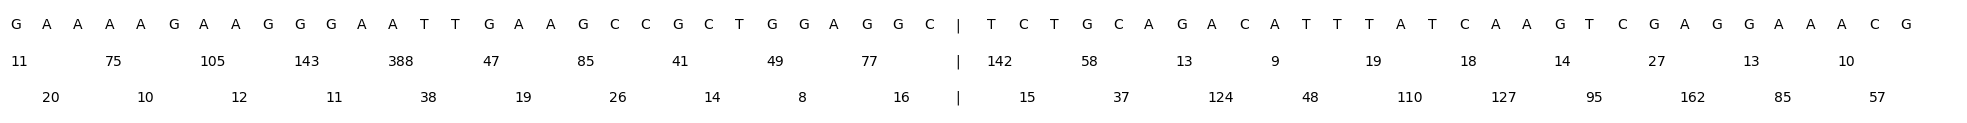

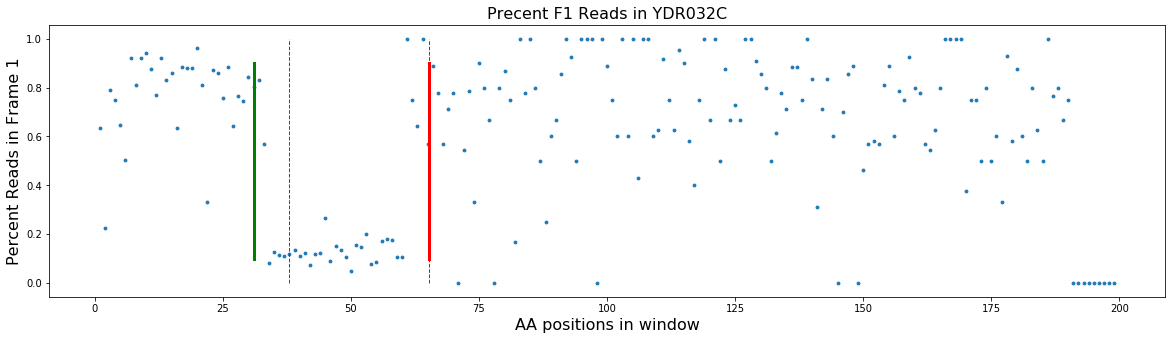


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR086C	p-value: 6.530171508486161e-09	gene-length: 244	shift-start-position: 132	shift-length 76
Simulated Percent: 0.5


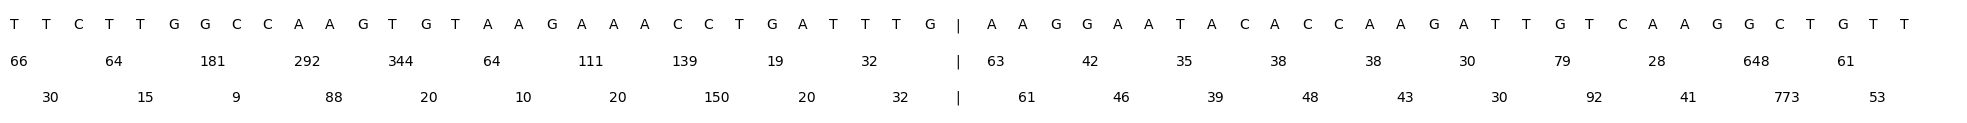

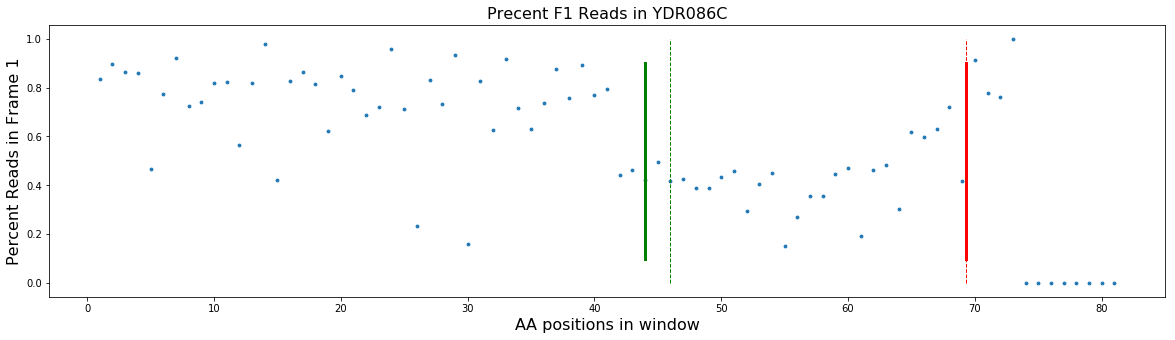


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR098C	p-value: 9.198448037783013e-05	gene-length: 859	shift-start-position: 51	shift-length 97
Simulated Percent: 0.05


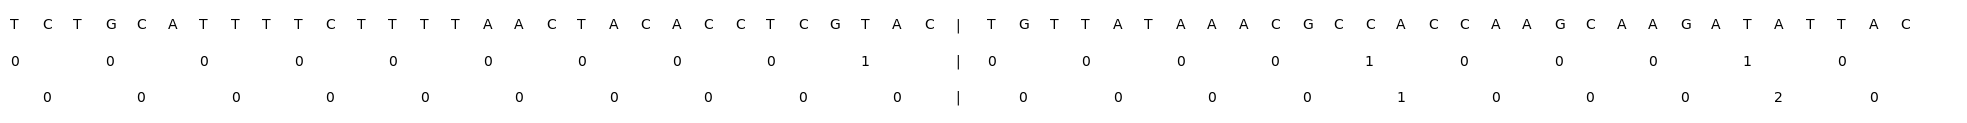

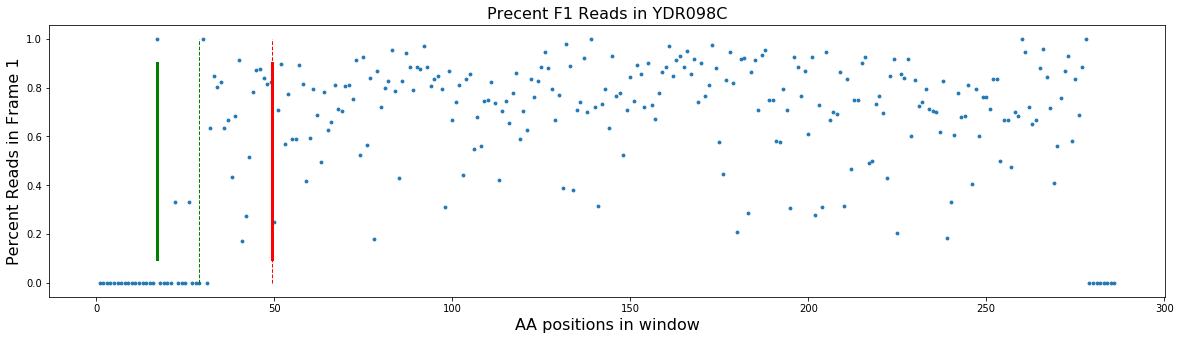


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR177W	p-value: 2.673756638619526e-07	gene-length: 649	shift-start-position: 171	shift-length 104
Simulated Percent: 0.5


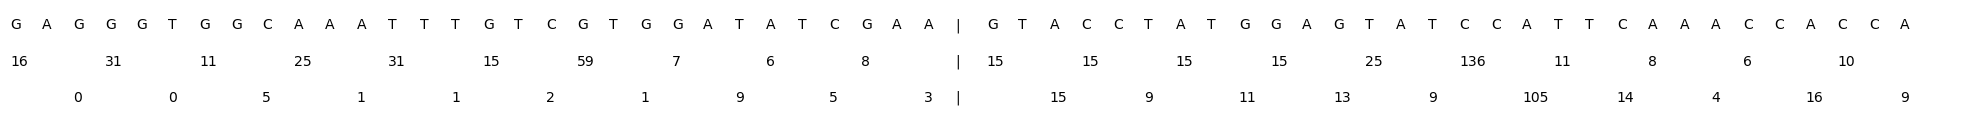

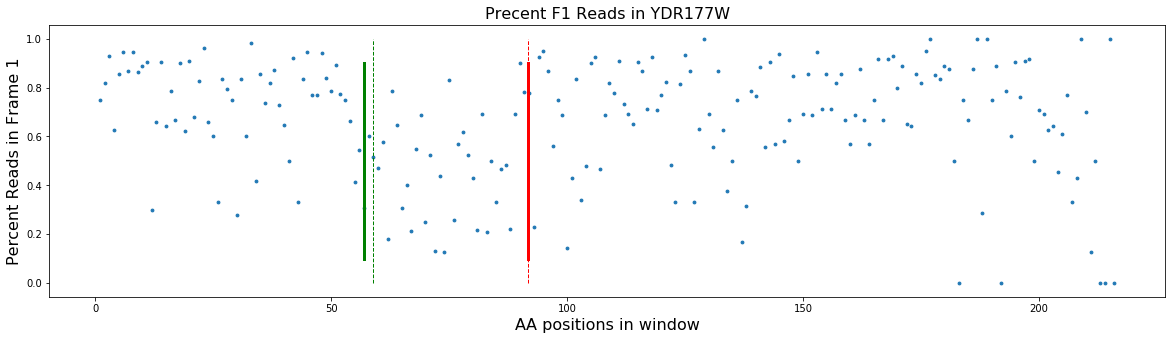


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR224C	p-value: 3.686286873324919e-09	gene-length: 397	shift-start-position: 60	shift-length 85
Simulated Percent: 0.7


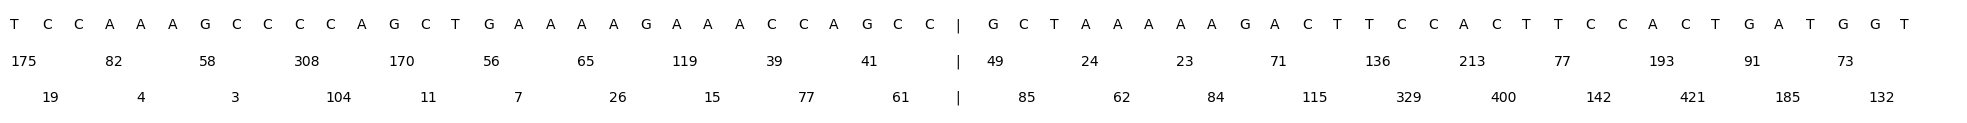

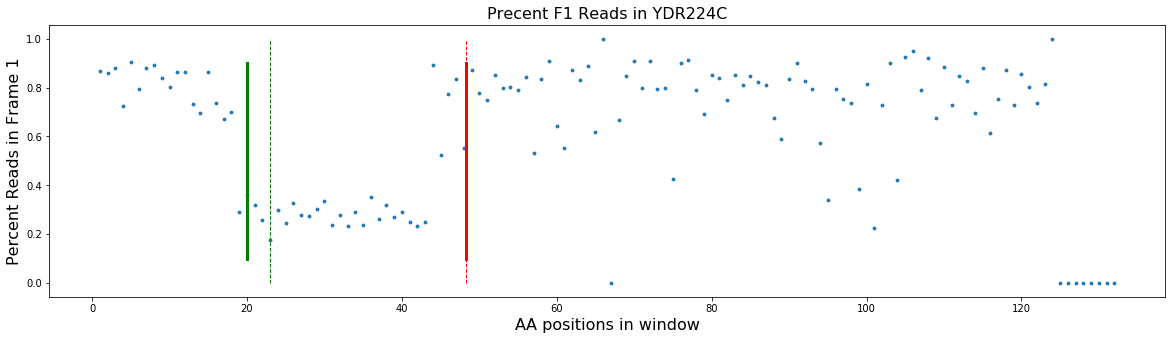


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR298C	p-value: 4.0374834422217225e-06	gene-length: 640	shift-start-position: 132	shift-length 76
Simulated Percent: 0.3


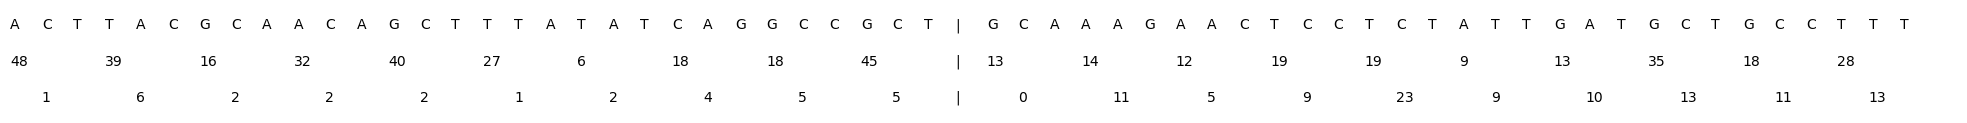

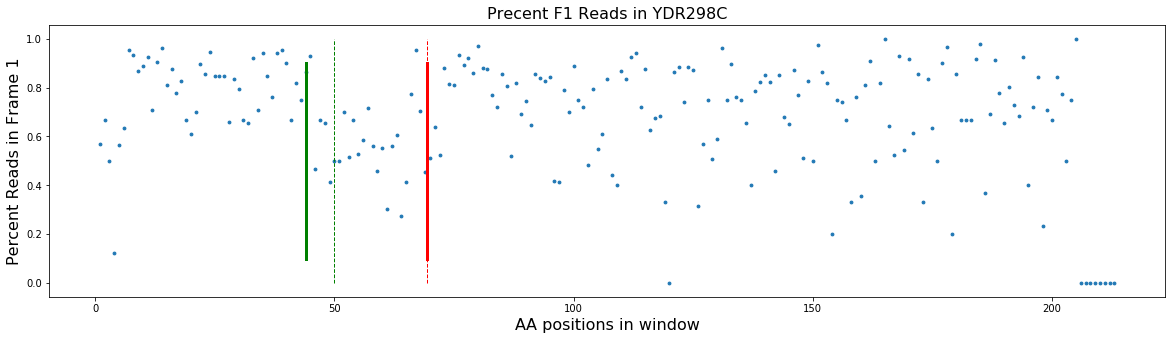


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR368W	p-value: 1.5019256473010095e-24	gene-length: 940	shift-start-position: 729	shift-length 178
Simulated Percent: 0.9


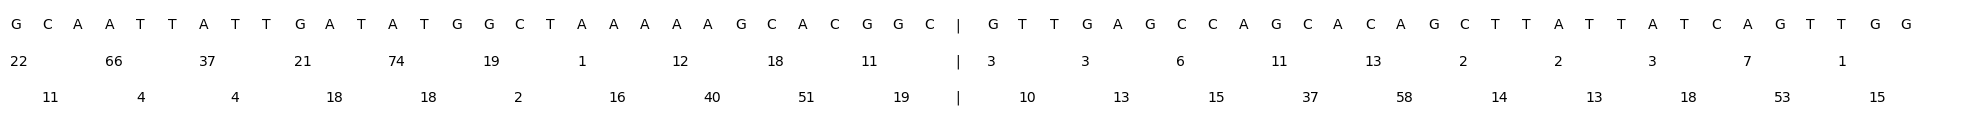

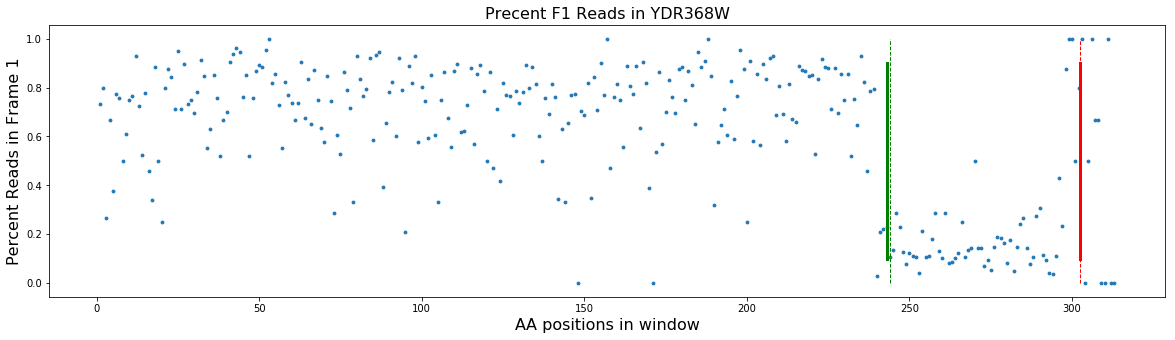


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR377W	p-value: 4.356225129431013e-05	gene-length: 307	shift-start-position: 174	shift-length 55
Simulated Percent: 0.5


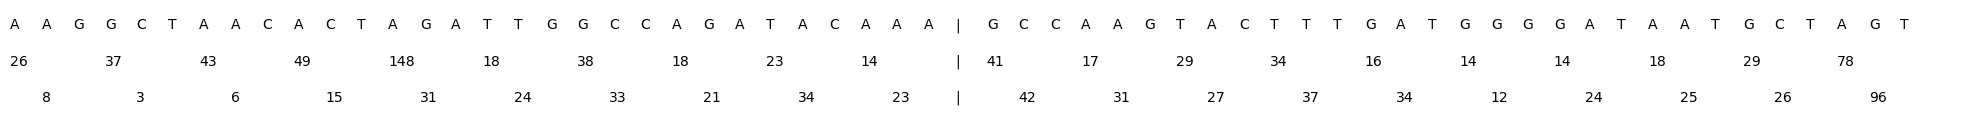

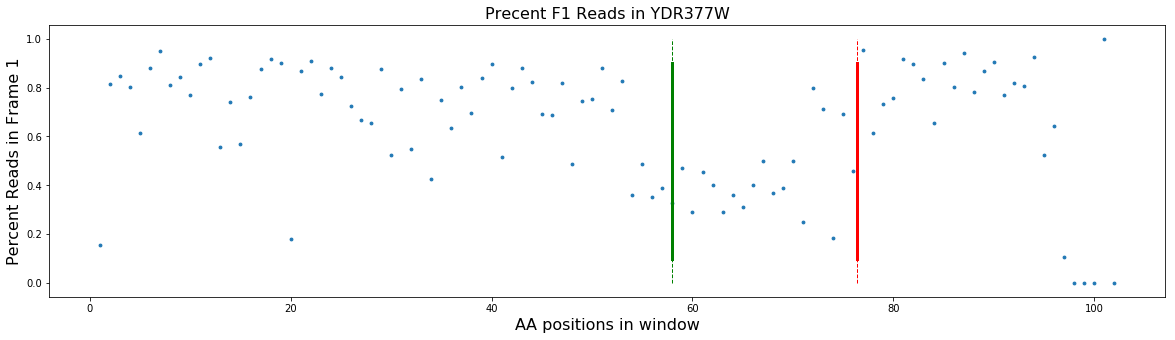


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YDR454C	p-value: 2.1454645782900894e-06	gene-length: 565	shift-start-position: 213	shift-length 79
Simulated Percent: 0.6


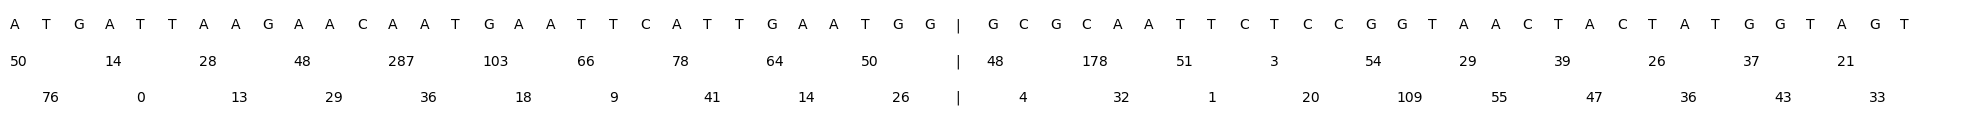

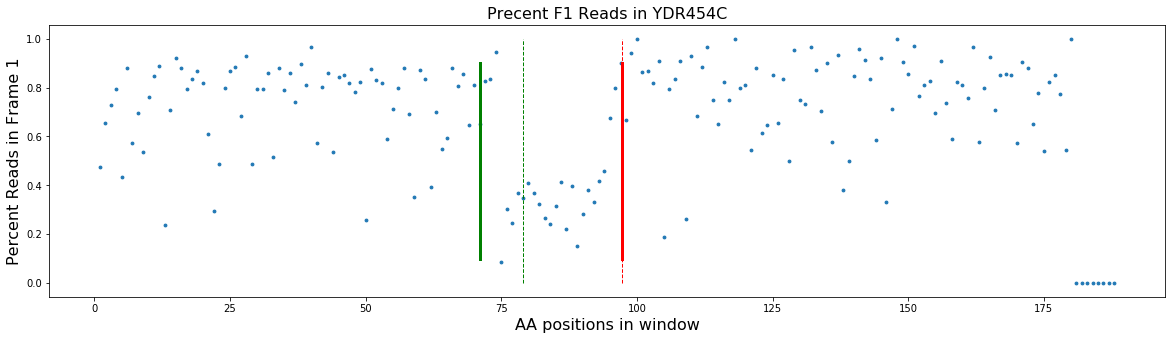


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YEL001C	p-value: 7.441172593236961e-15	gene-length: 679	shift-start-position: 459	shift-length 38
Simulated Percent: 0.9


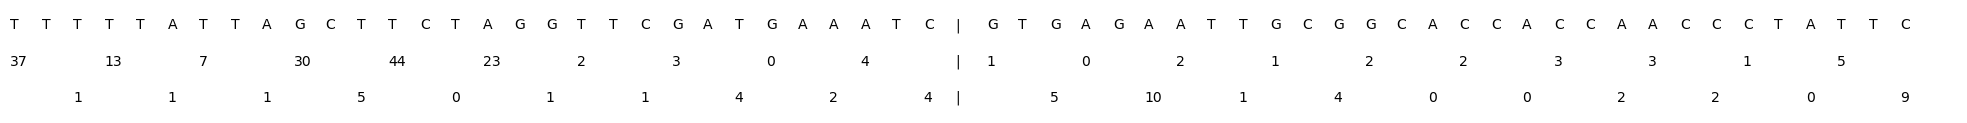

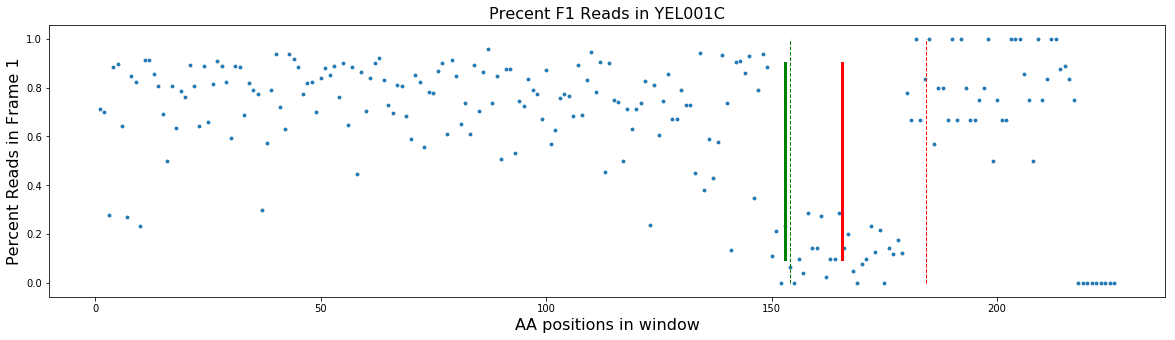


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YER025W	p-value: 2.2870459779821745e-09	gene-length: 1585	shift-start-position: 144	shift-length 94
Simulated Percent: 0.6


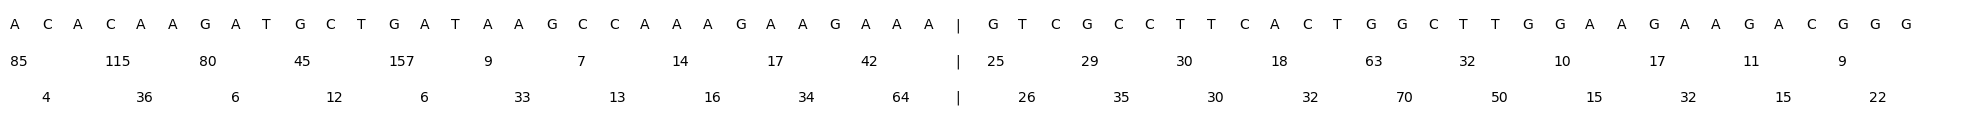

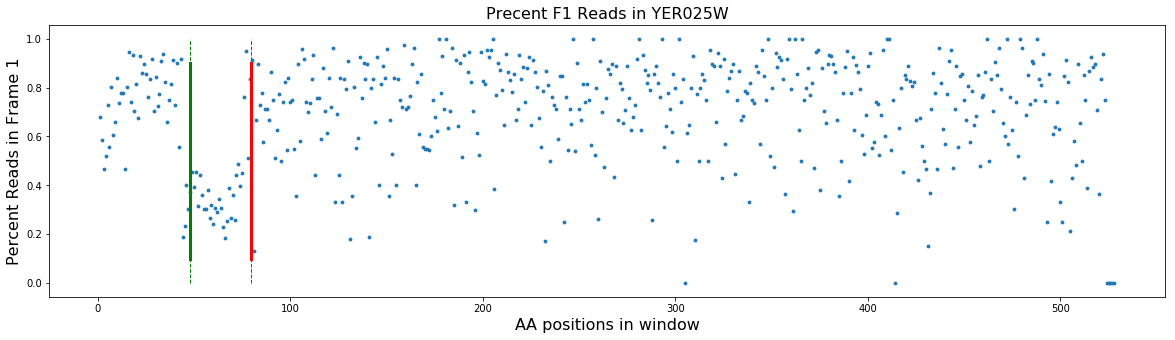


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YER031C	p-value: 9.726781508922371e-08	gene-length: 673	shift-start-position: 72	shift-length 187
Simulated Percent: 0.7


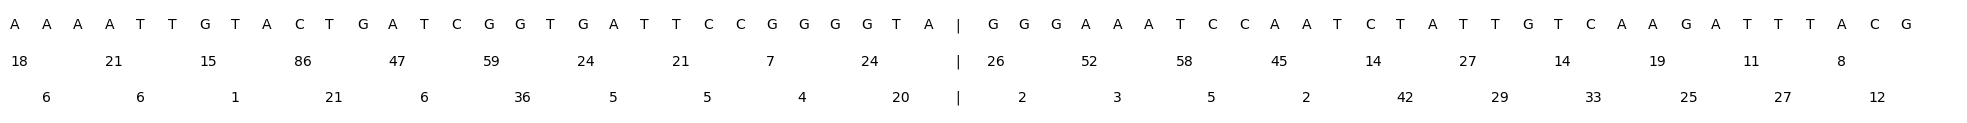

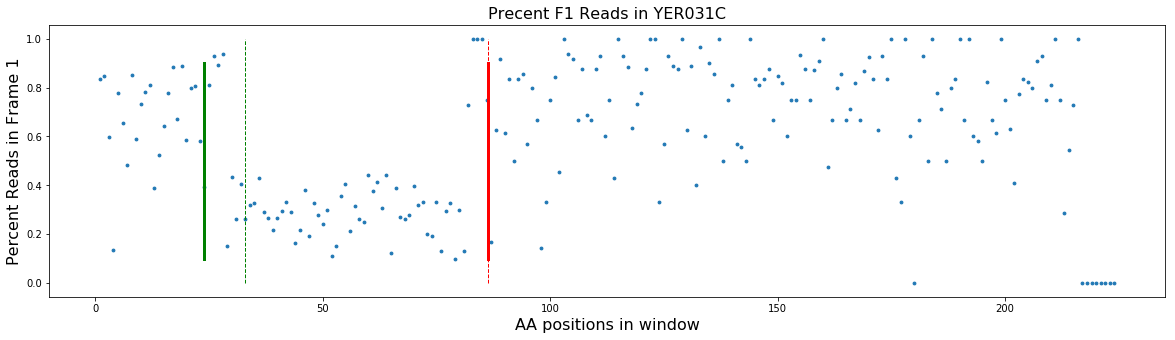


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YER057C	p-value: 1.81898252663088e-05	gene-length: 391	shift-start-position: 228	shift-length 115
Simulated Percent: 0.4


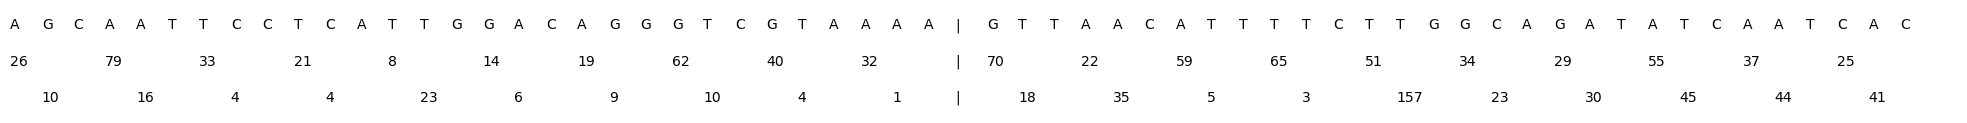

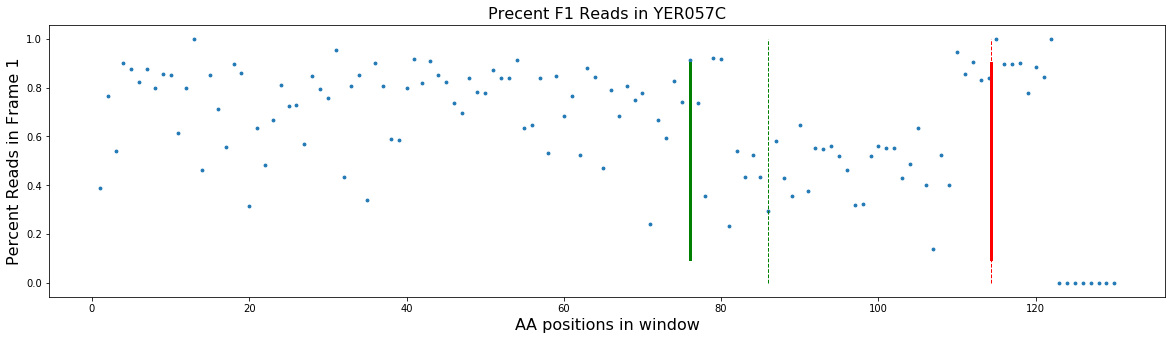


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YFL014W	p-value: 3.823933008618245e-08	gene-length: 331	shift-start-position: 123	shift-length 142
Simulated Percent: 0.3


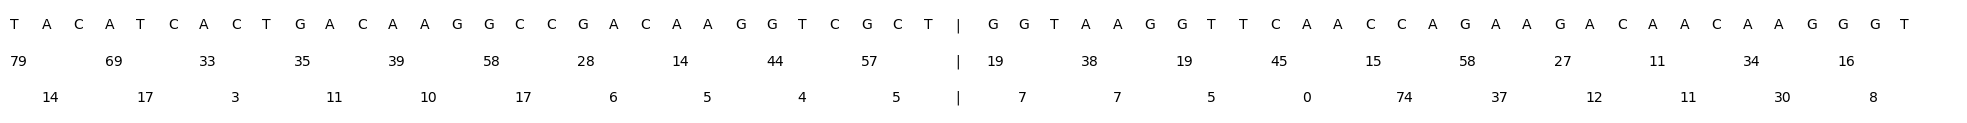

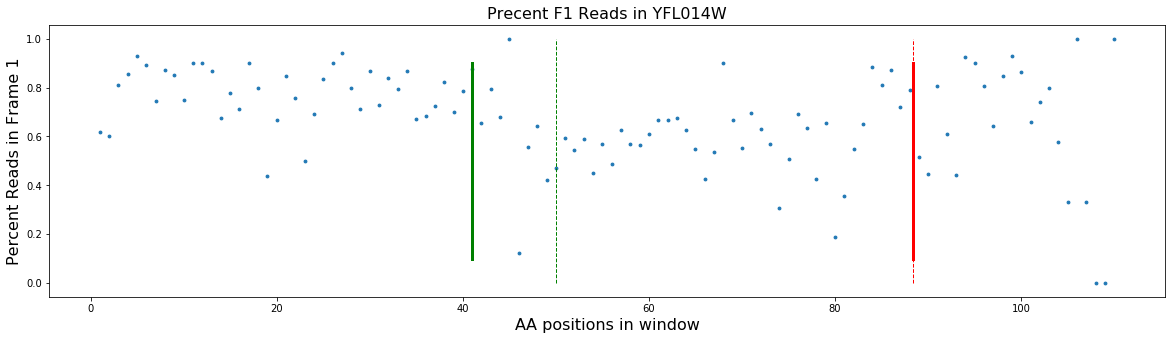


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGL191W	p-value: 1.7612744467296888e-05	gene-length: 391	shift-start-position: 111	shift-length 82
Simulated Percent: 0.3


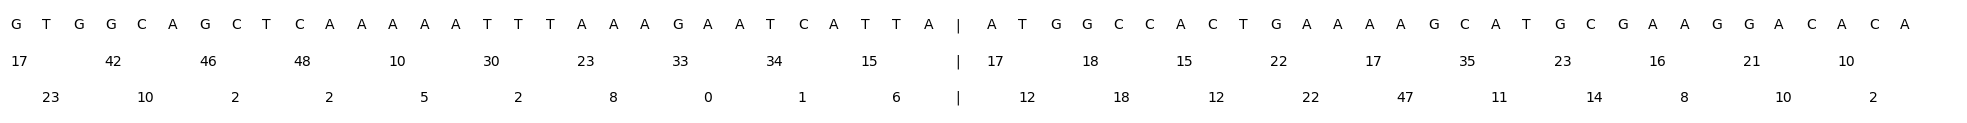

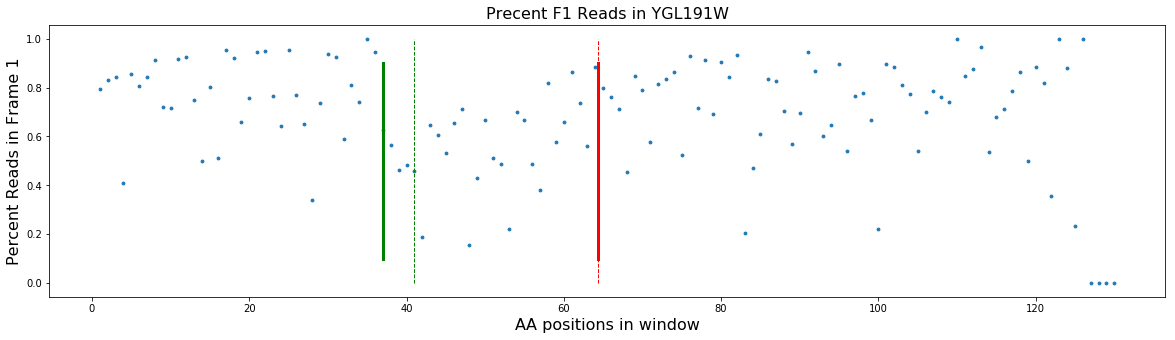


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGL008C	p-value: 2.0938139511454615e-06	gene-length: 2758	shift-start-position: 1365	shift-length 76
Simulated Percent: 0.5


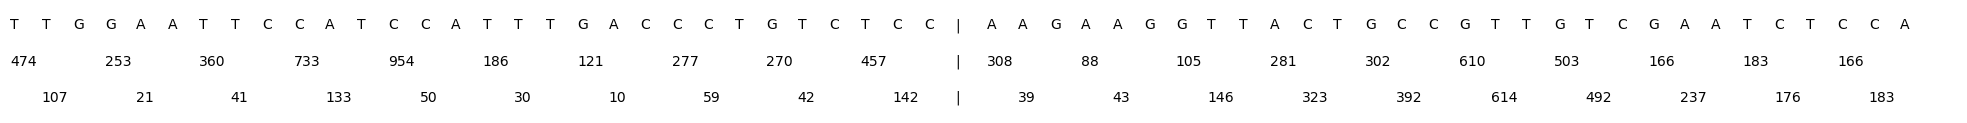

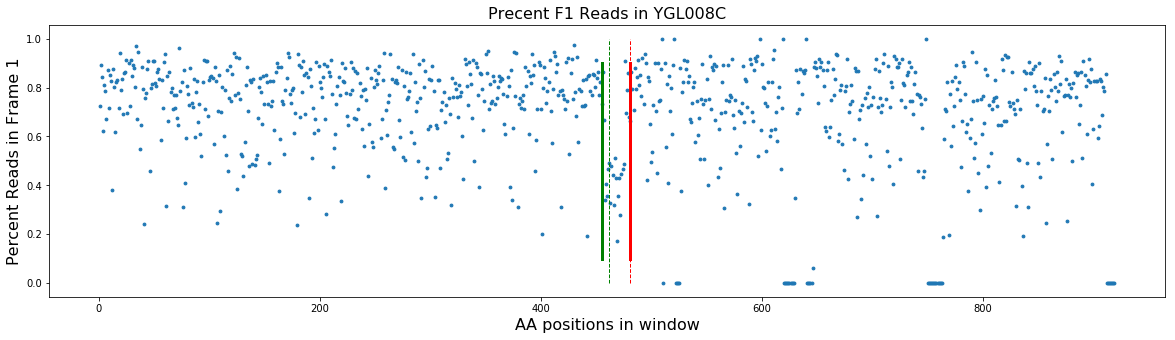


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGR027C	p-value: 1.592458064459802e-19	gene-length: 655	shift-start-position: 300	shift-length 121
Simulated Percent: 0.5


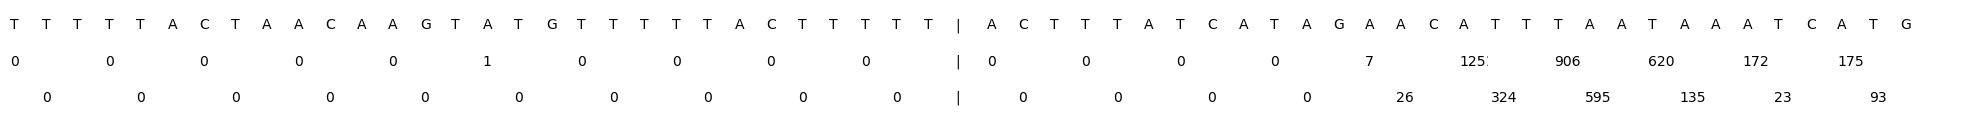

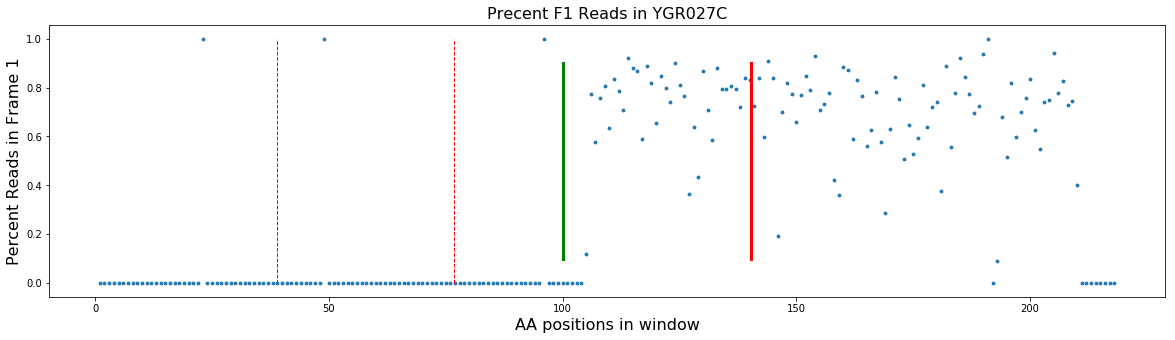


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YGR180C	p-value: 1.2509468602381987e-06	gene-length: 1039	shift-start-position: 543	shift-length 55
Simulated Percent: 0.5


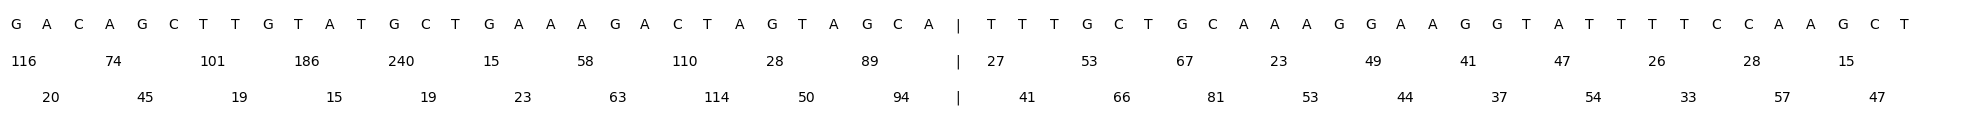

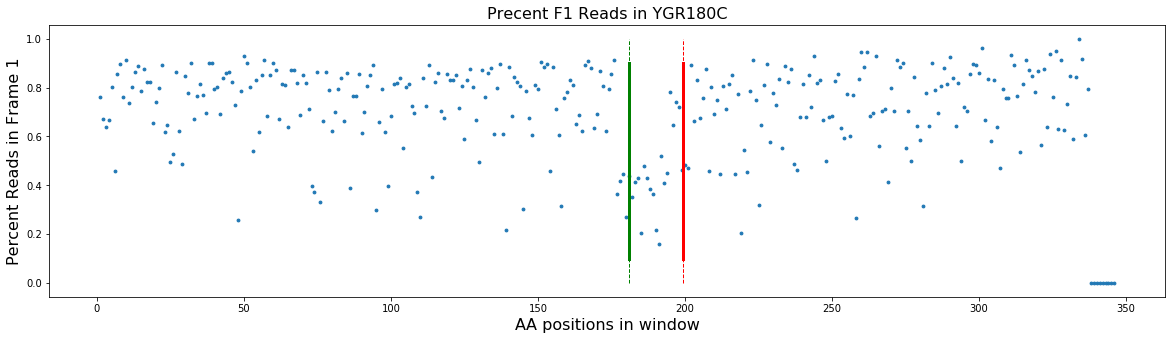


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YHR174W	p-value: 2.6125315498366943e-11	gene-length: 1315	shift-start-position: 63	shift-length 89
Simulated Percent: 0.4


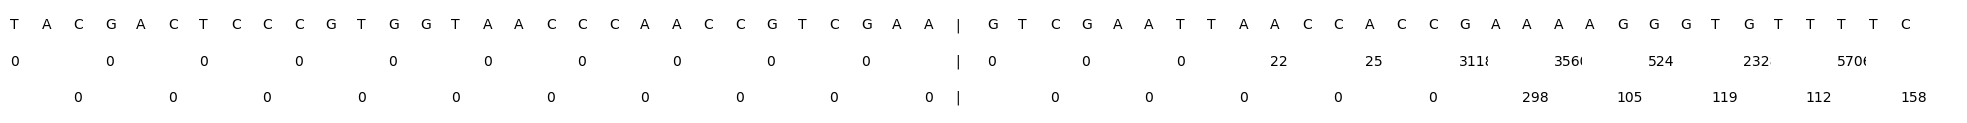

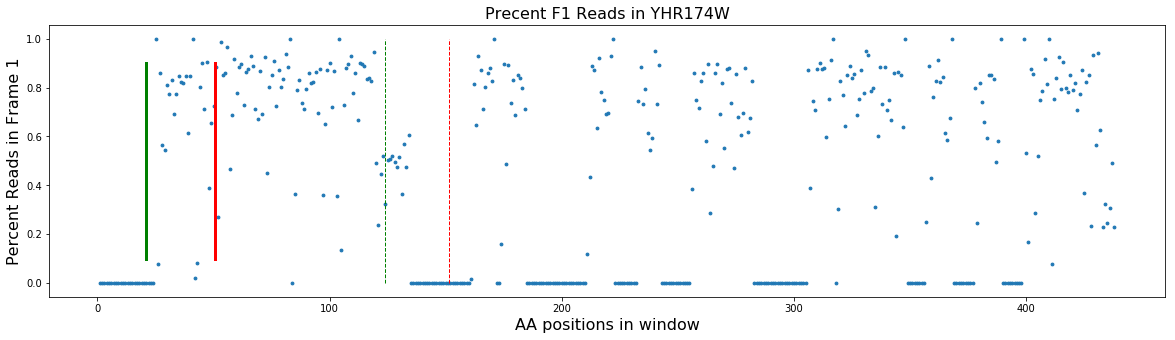


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YIL053W	p-value: 3.892776369745014e-06	gene-length: 754	shift-start-position: 405	shift-length 55
Simulated Percent: 0.6


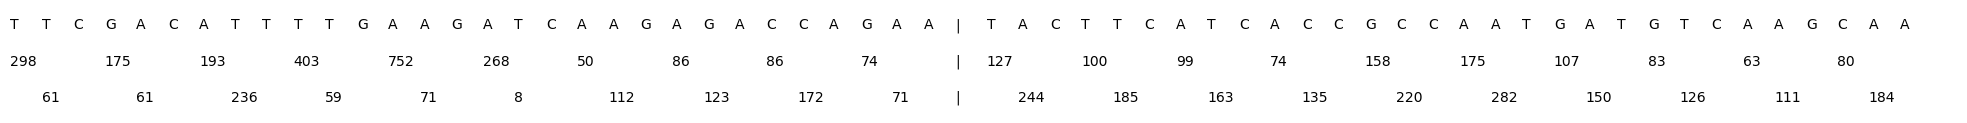

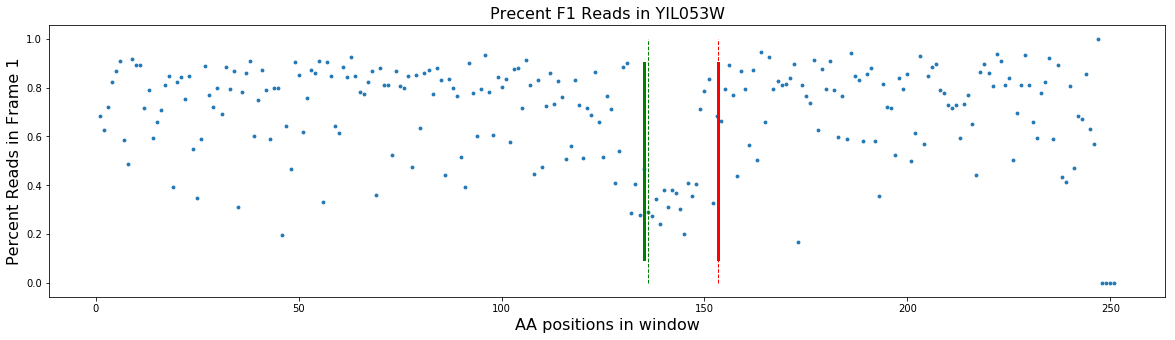


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YIL051C	p-value: 3.0444083305355356e-05	gene-length: 439	shift-start-position: 171	shift-length 67
Simulated Percent: 0.4


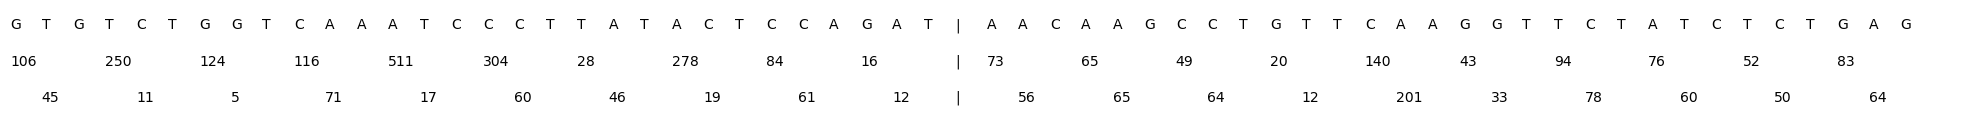

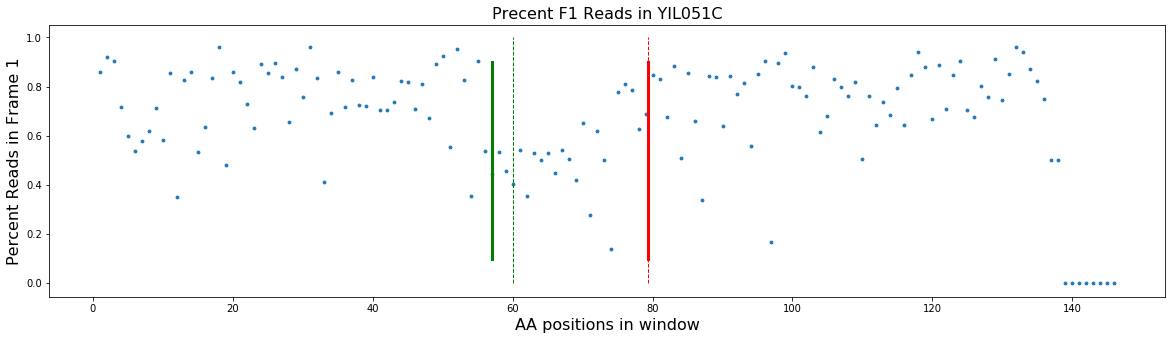


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YJL167W	p-value: 5.687732498404442e-06	gene-length: 1060	shift-start-position: 732	shift-length 67
Simulated Percent: 0.4


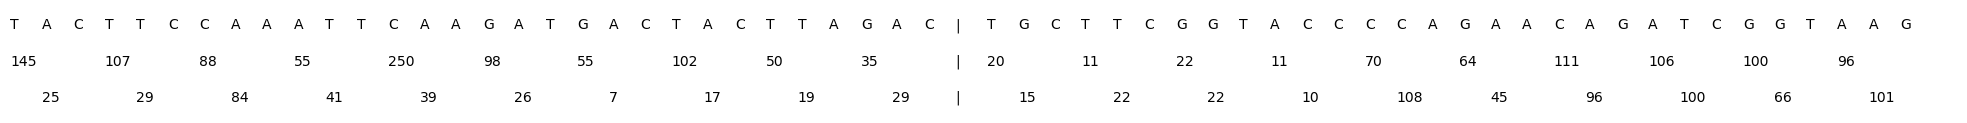

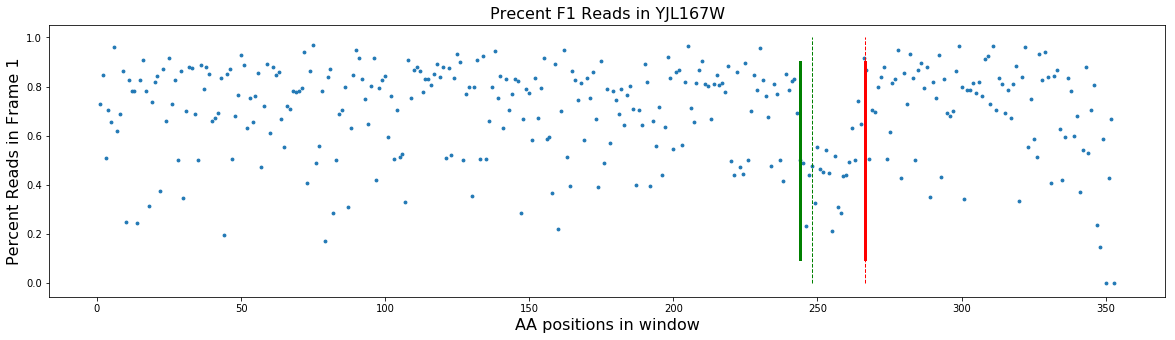


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YJR045C	p-value: 6.894488535489004e-34	gene-length: 1966	shift-start-position: 1065	shift-length 178
Simulated Percent: 0.8


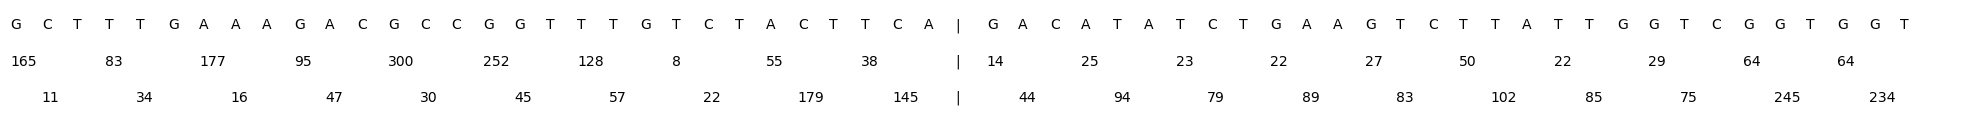

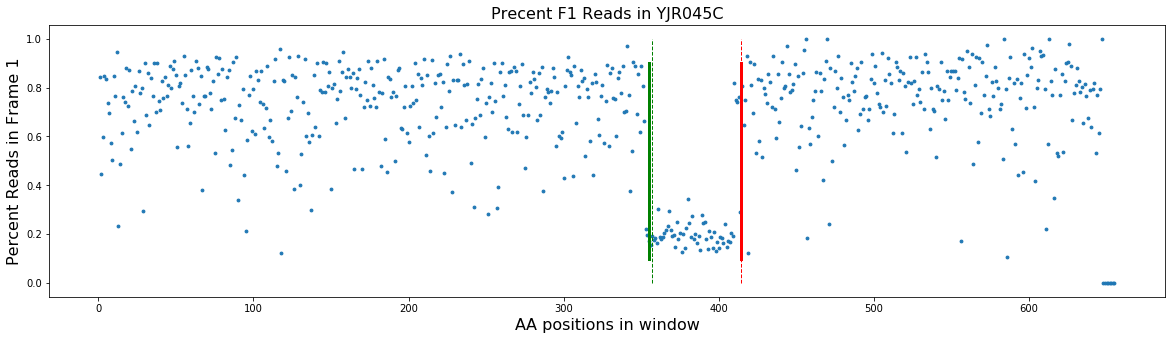


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YJR104C	p-value: 9.155445729357467e-13	gene-length: 466	shift-start-position: 135	shift-length 127
Simulated Percent: 0.9


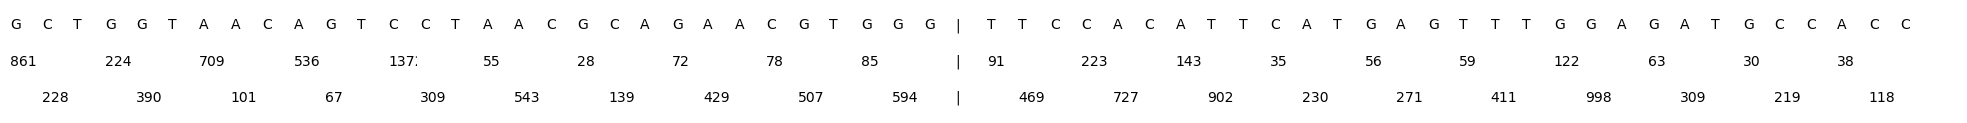

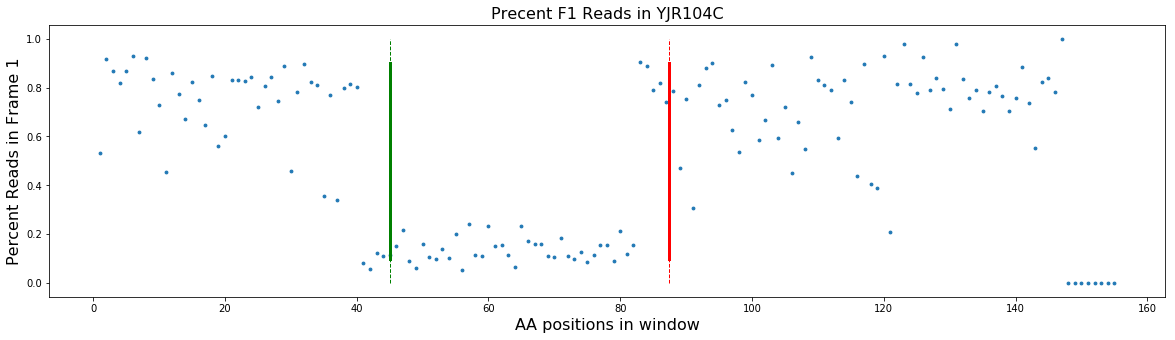


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YJR139C	p-value: 1.6372292407221105e-23	gene-length: 1081	shift-start-position: 249	shift-length 217
Simulated Percent: 0.5


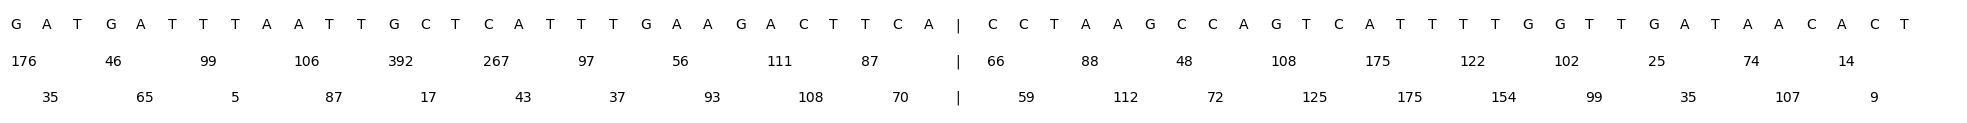

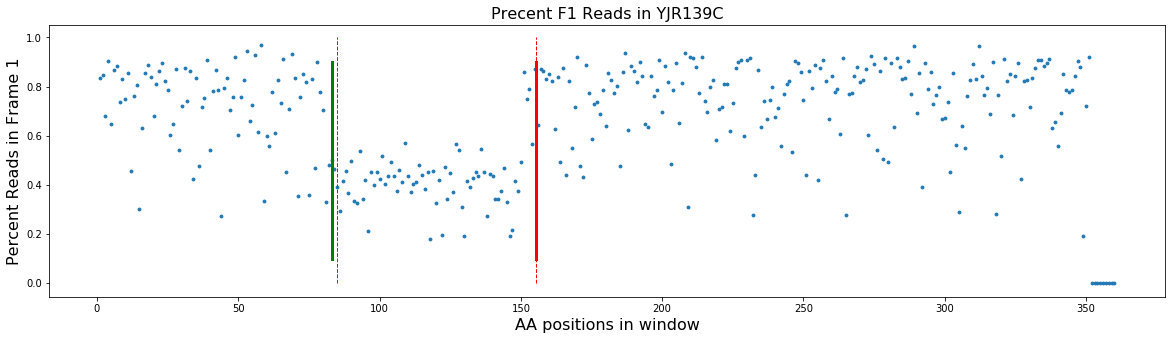


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YKL096W-A	p-value: 2.1387823012415292e-17	gene-length: 280	shift-start-position: 135	shift-length 118
Simulated Percent: 0.7


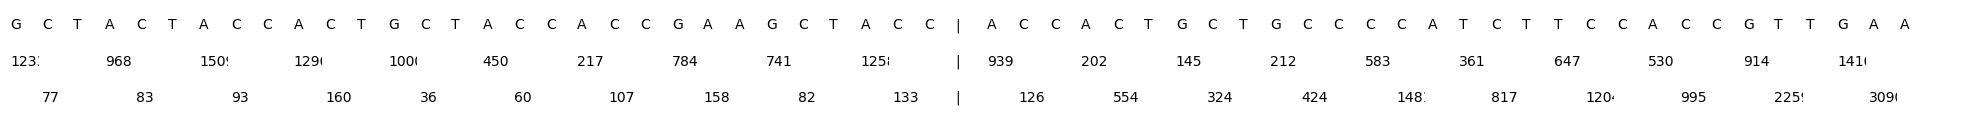

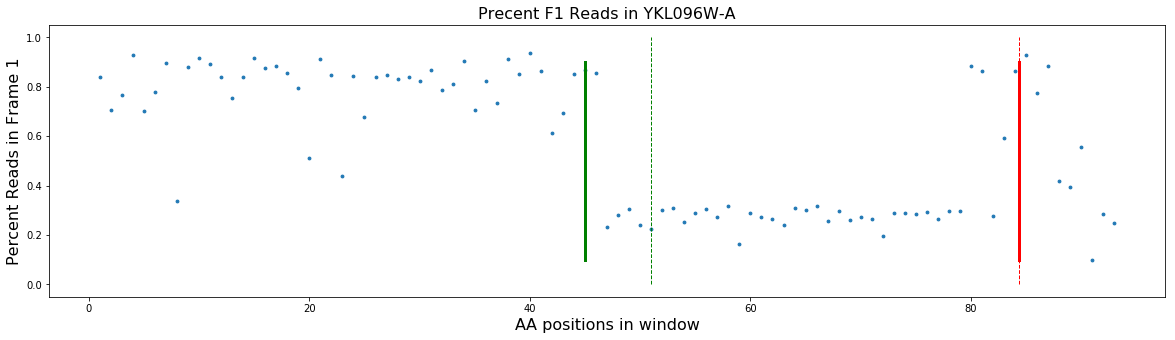


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YKR001C	p-value: 1.0841993982115895e-10	gene-length: 2116	shift-start-position: 1710	shift-length 100
Simulated Percent: 0.9


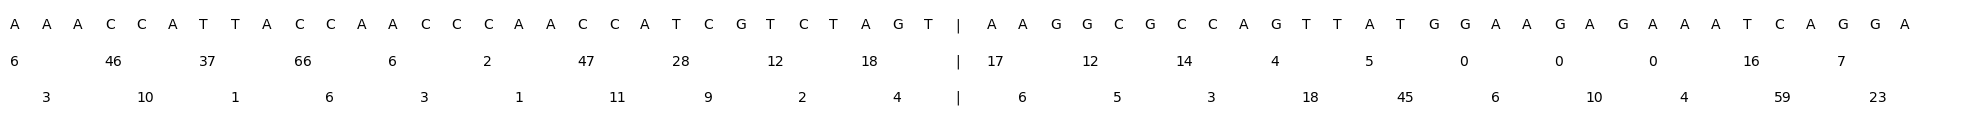

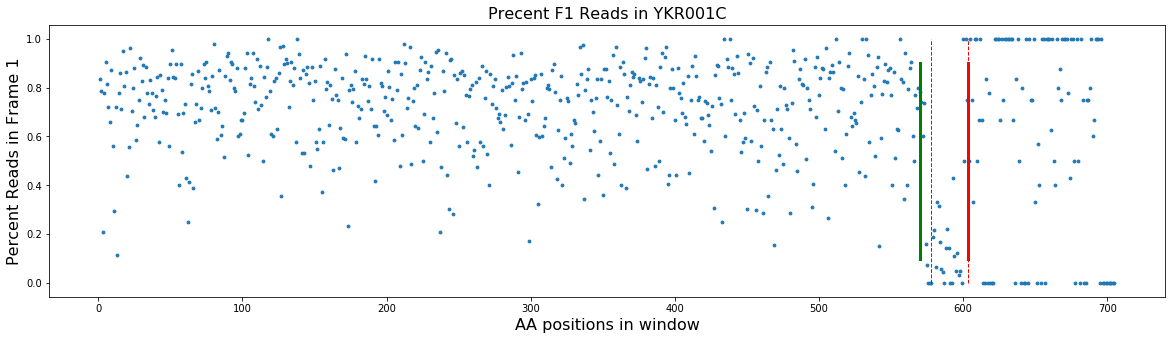


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YLR179C	p-value: 8.502502655820345e-14	gene-length: 607	shift-start-position: 246	shift-length 109
Simulated Percent: 0.7


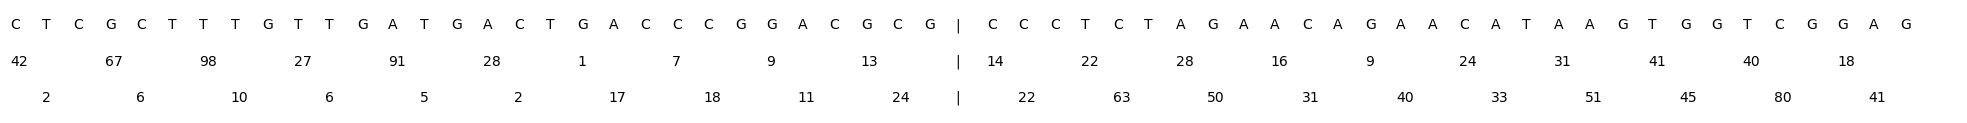

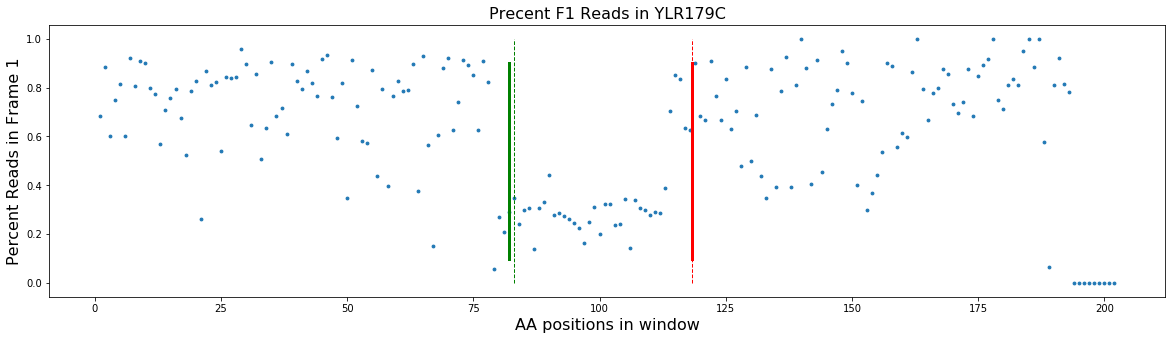


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YLR192C	p-value: 3.607479944277885e-05	gene-length: 799	shift-start-position: 696	shift-length 55
Simulated Percent: 0.7


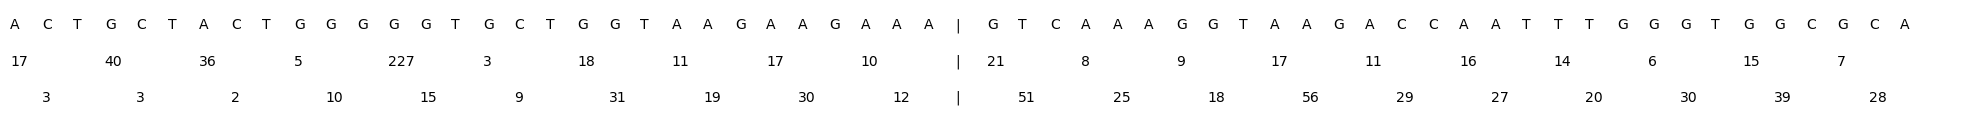

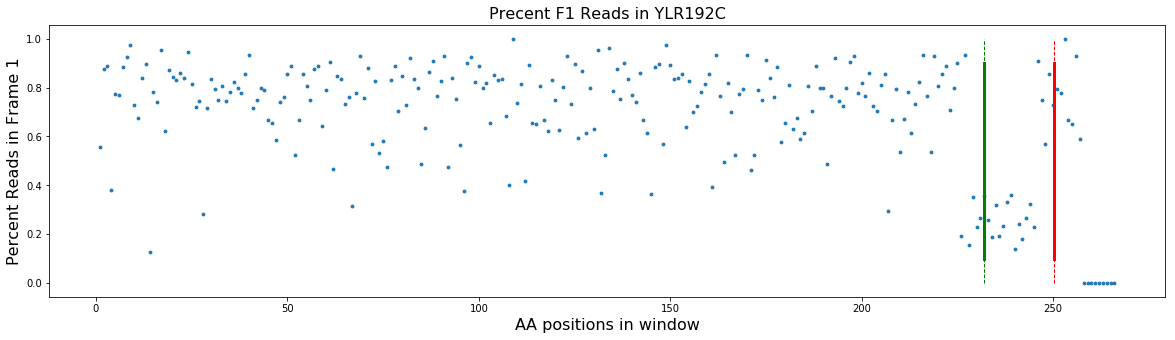


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YLR259C	p-value: 2.7413261725927613e-05	gene-length: 1720	shift-start-position: 1188	shift-length 76
Simulated Percent: 0.7


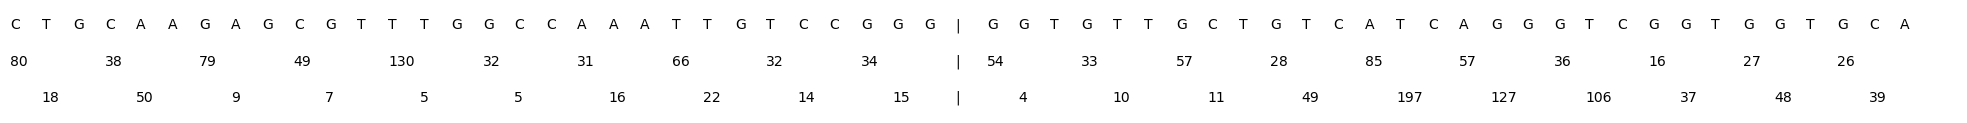

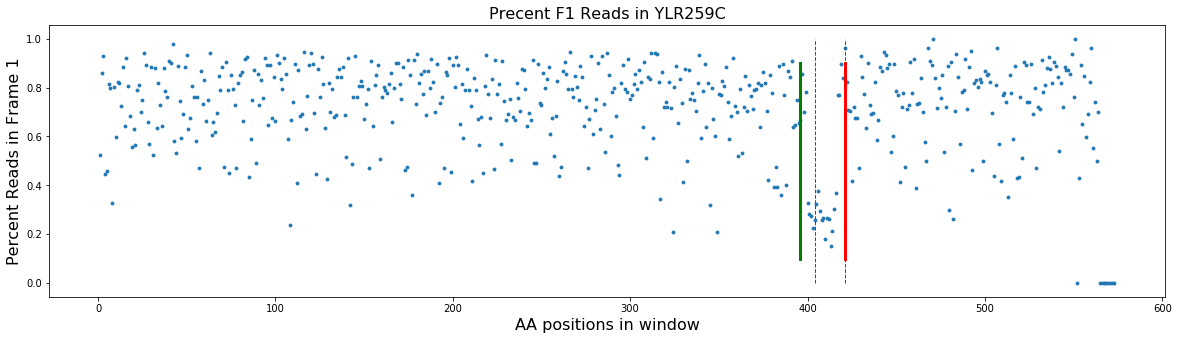


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YLR359W	p-value: 5.666830729433365e-07	gene-length: 1450	shift-start-position: 1086	shift-length 73
Simulated Percent: 0.8


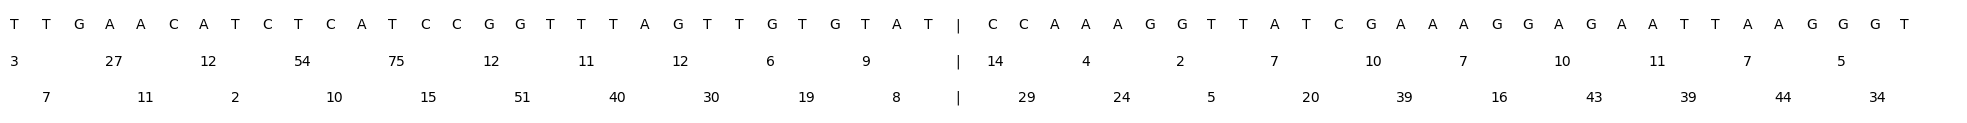

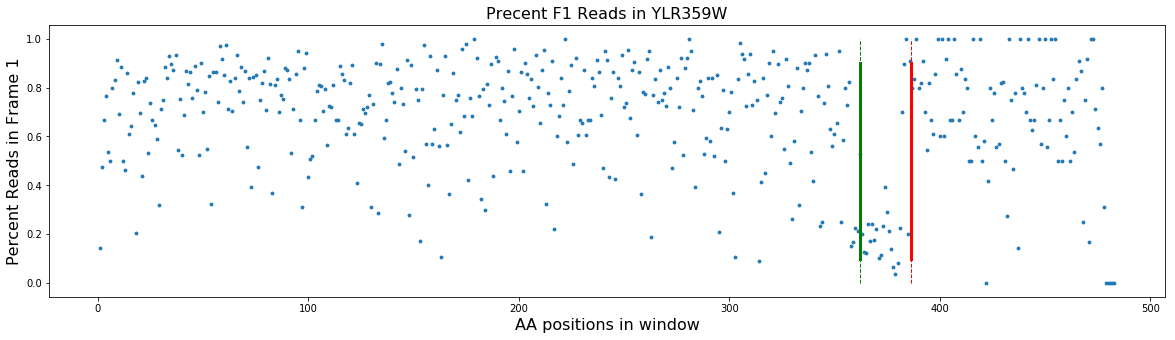


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YLR441C	p-value: 6.709145590099482e-06	gene-length: 769	shift-start-position: 438	shift-length 76
Simulated Percent: 0.6


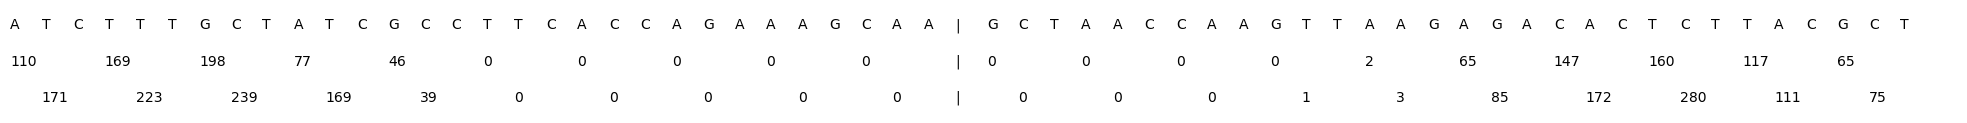

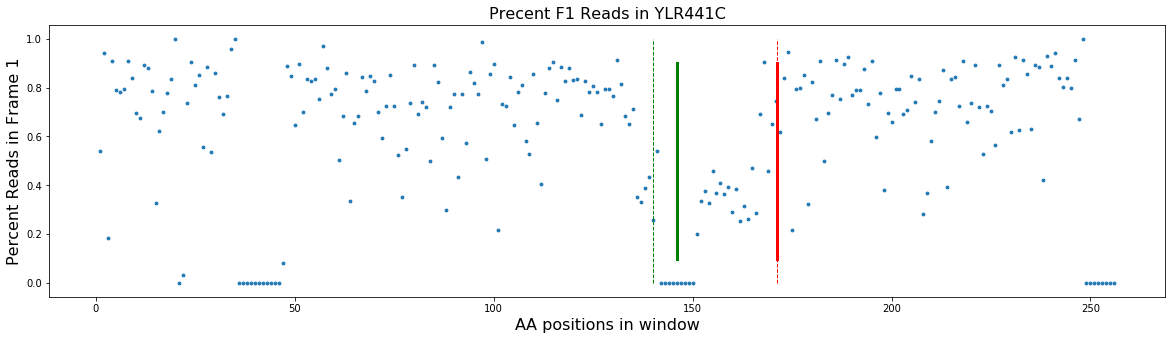


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YMR120C	p-value: 2.58523101793116e-12	gene-length: 1780	shift-start-position: 1017	shift-length 130
Simulated Percent: 0.7


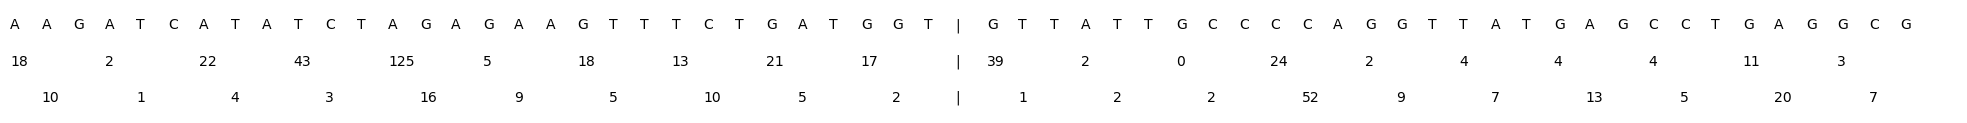

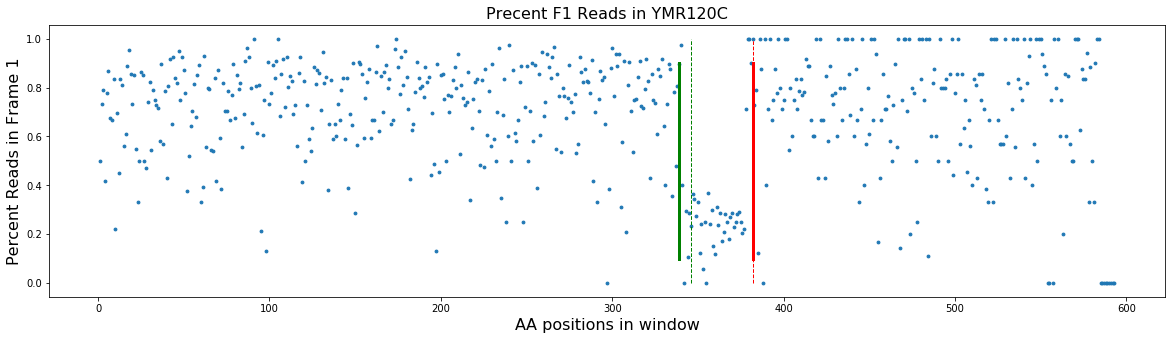


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YMR256C	p-value: 1.9156194863533476e-05	gene-length: 184	shift-start-position: 75	shift-length 80
Simulated Percent: 0.9


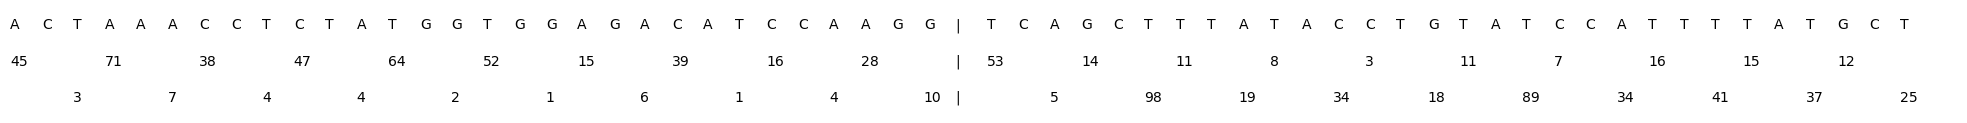

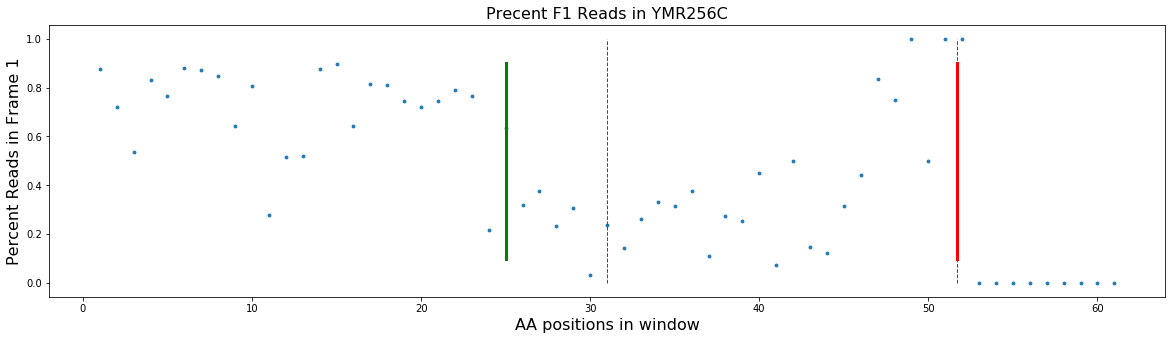


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YMR260C	p-value: 6.680794024965626e-08	gene-length: 463	shift-start-position: 81	shift-length 112
Simulated Percent: 0.9


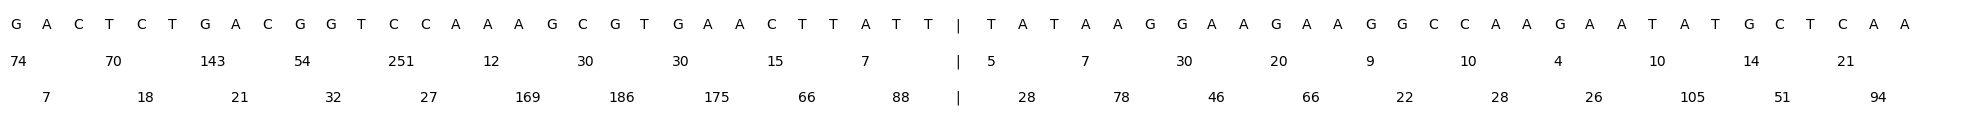

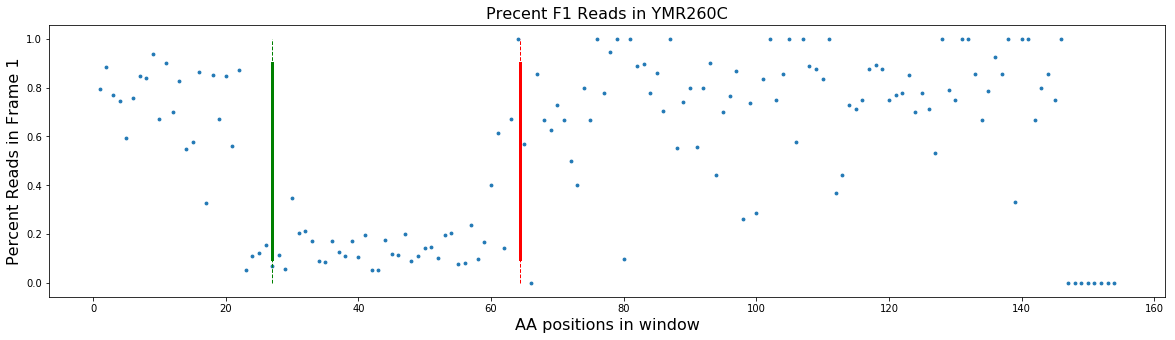


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YMR297W	p-value: 2.8777694292500603e-12	gene-length: 1600	shift-start-position: 735	shift-length 103
Simulated Percent: 0.8


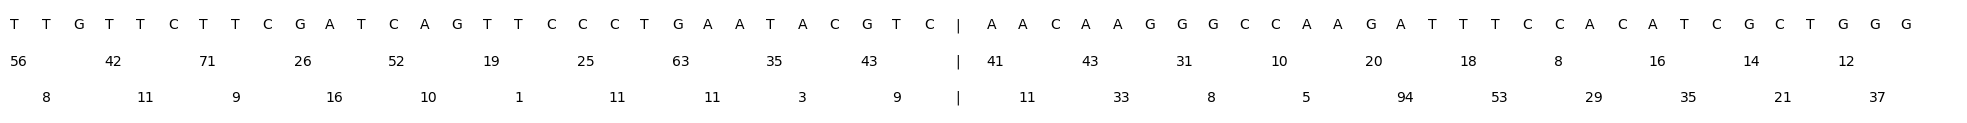

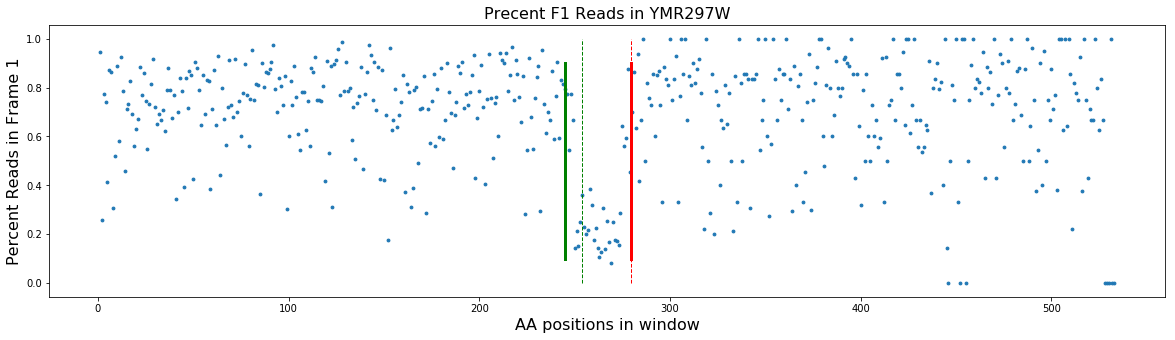


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YNL138W	p-value: 1.332231234327945e-12	gene-length: 1582	shift-start-position: 819	shift-length 121
Simulated Percent: 0.6


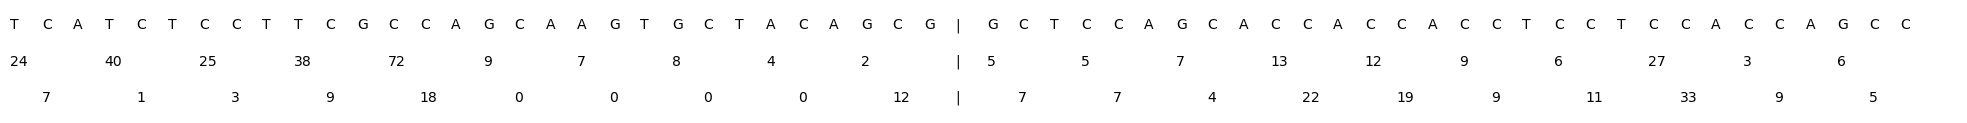

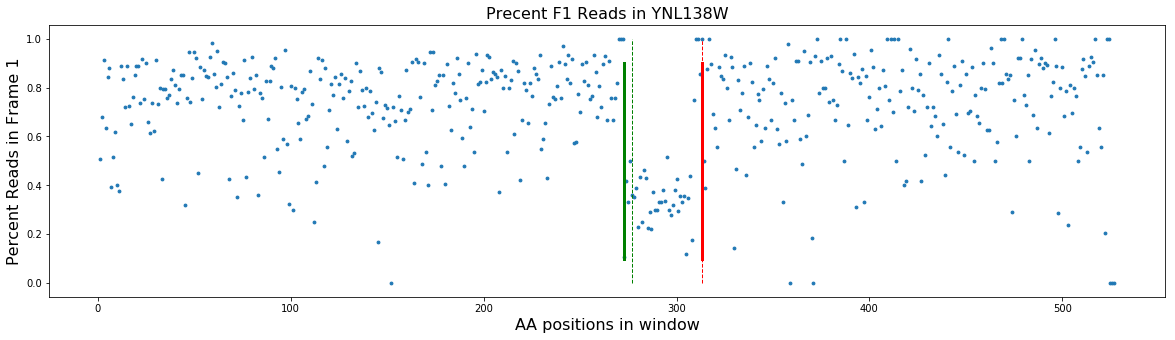


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YNL098C	p-value: 8.250404458220747e-06	gene-length: 970	shift-start-position: 210	shift-length 80
Simulated Percent: 0.7


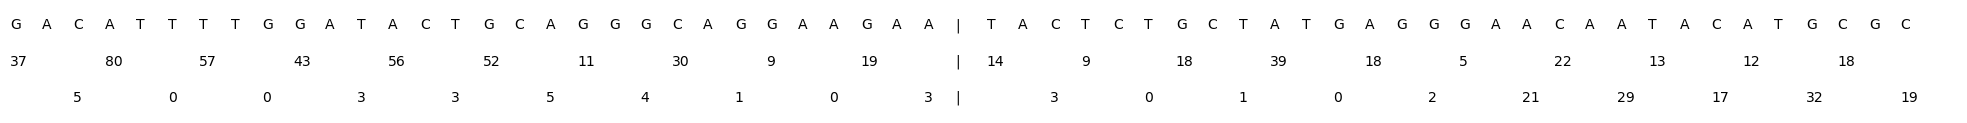

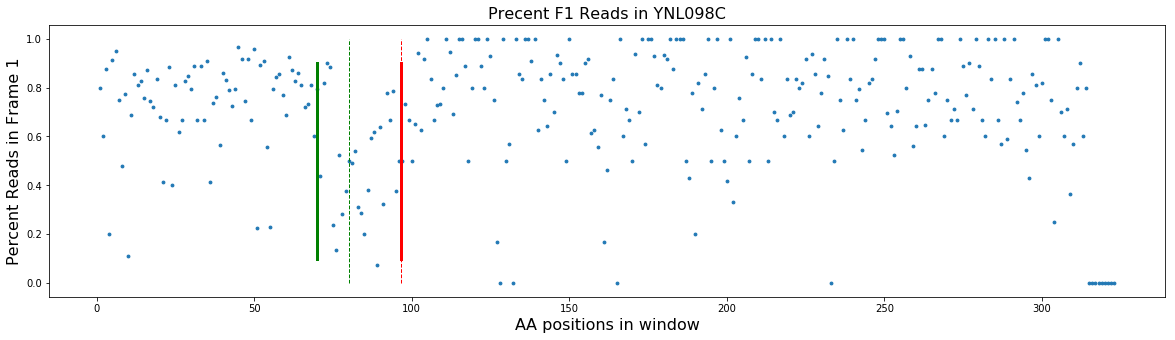


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YOL058W	p-value: 1.8151974054982673e-08	gene-length: 1264	shift-start-position: 546	shift-length 125
Simulated Percent: 0.6


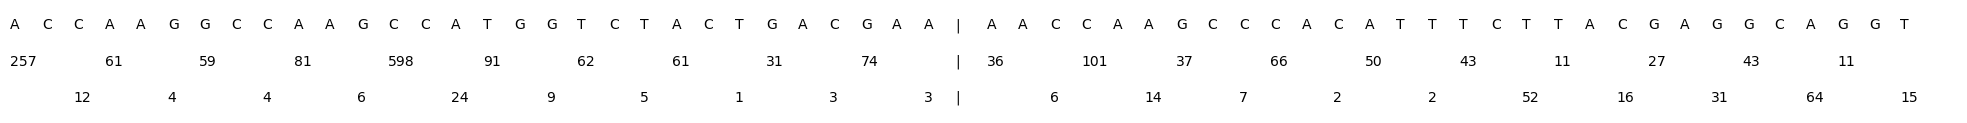

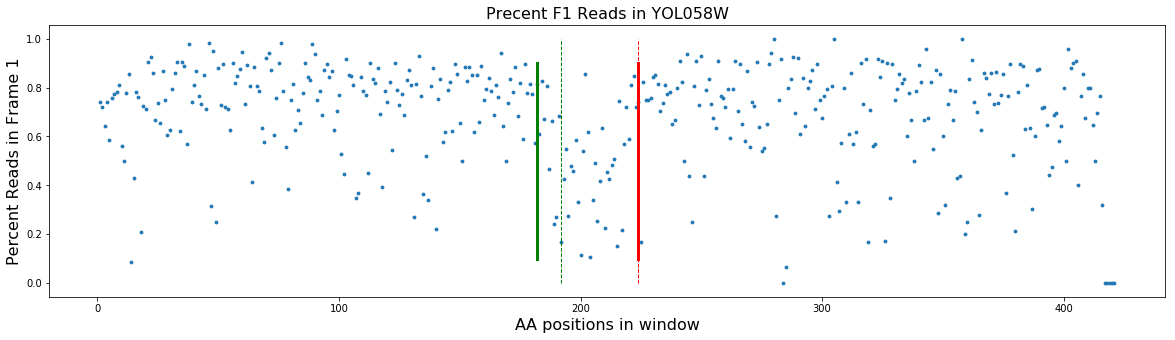


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YOR007C	p-value: 1.970650786679615e-07	gene-length: 1042	shift-start-position: 801	shift-length 95
Simulated Percent: 0.4


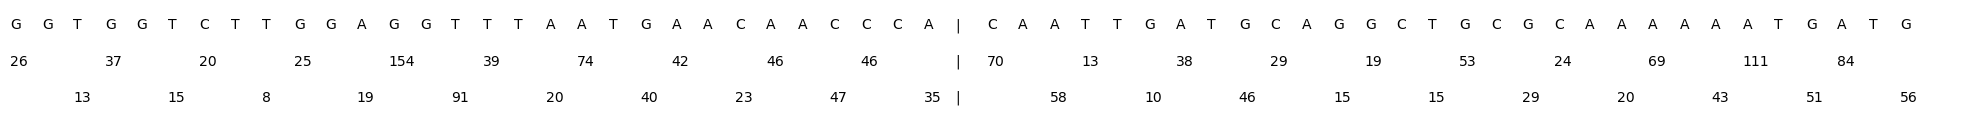

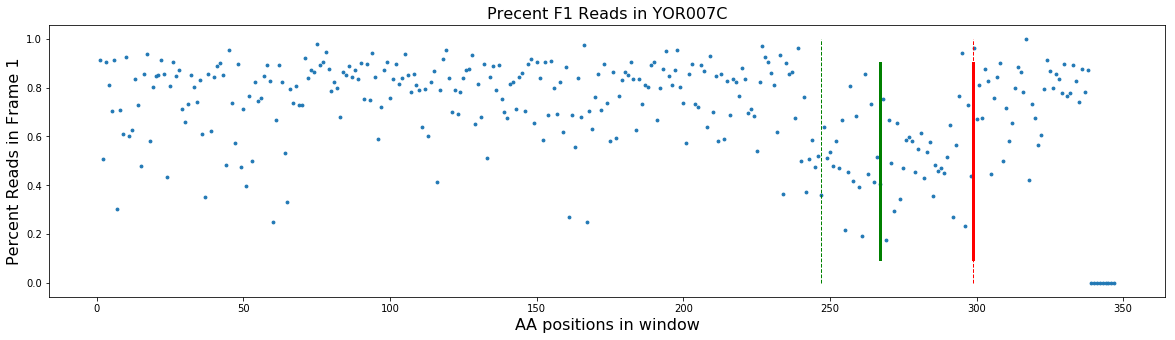


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YOR198C	p-value: 3.628222867826159e-05	gene-length: 1414	shift-start-position: 1254	shift-length 58
Simulated Percent: 0.8


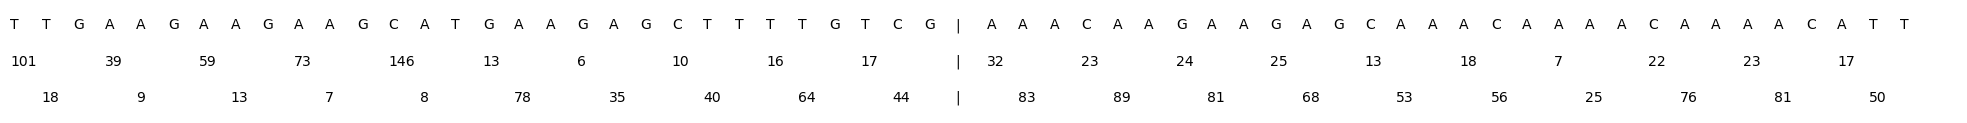

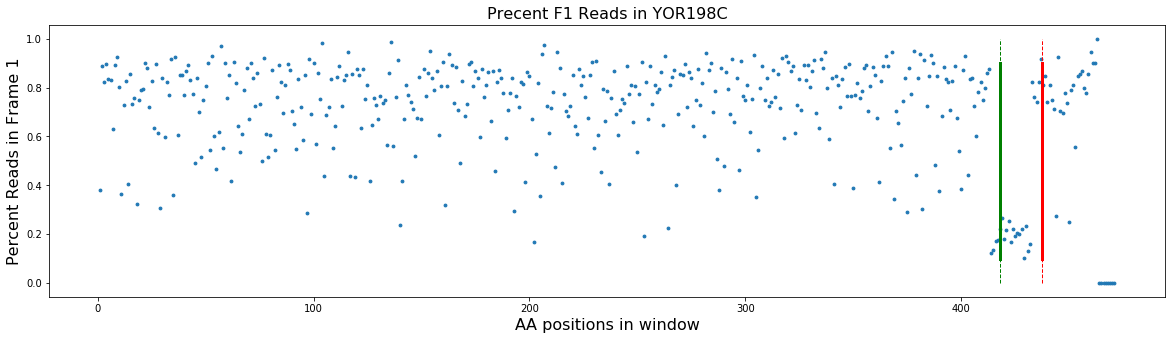


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YOR327C	p-value: 2.1719626422045076e-06	gene-length: 349	shift-start-position: 180	shift-length 85
Simulated Percent: 0.2


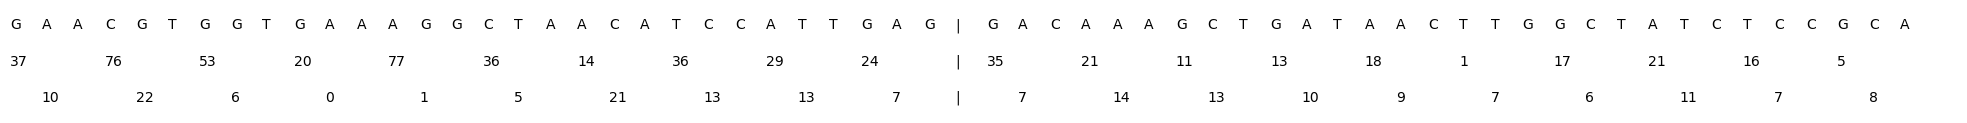

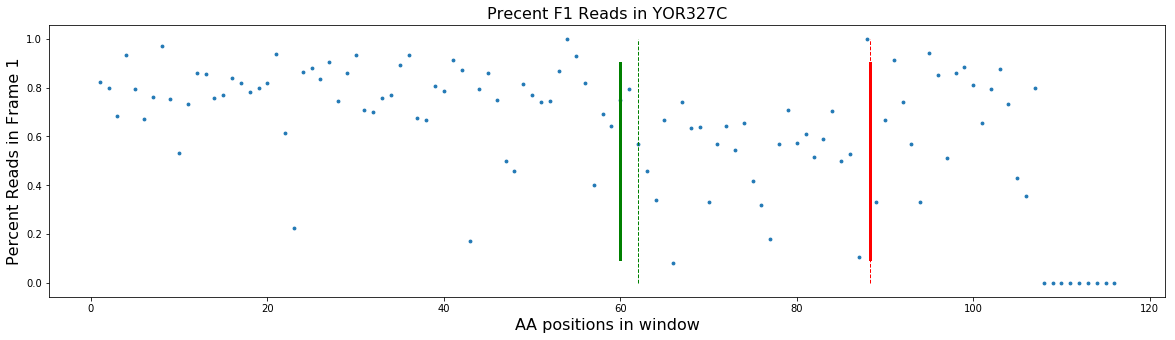


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YOR361C	p-value: 1.331786242590128e-07	gene-length: 2293	shift-start-position: 90	shift-length 53
Simulated Percent: 0.4


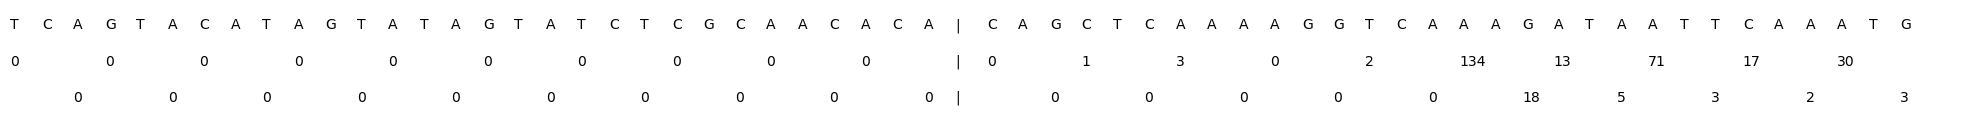

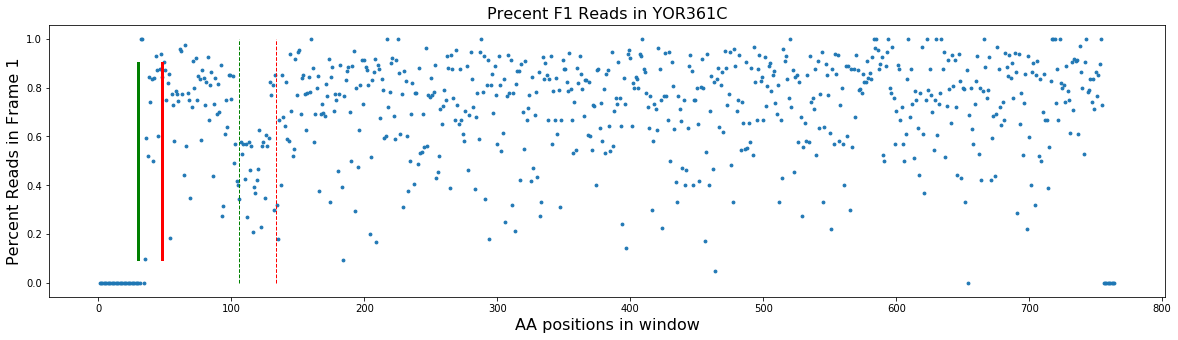


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YOR369C	p-value: 1.4763783138176086e-16	gene-length: 433	shift-start-position: 294	shift-length 109
Simulated Percent: 0.6


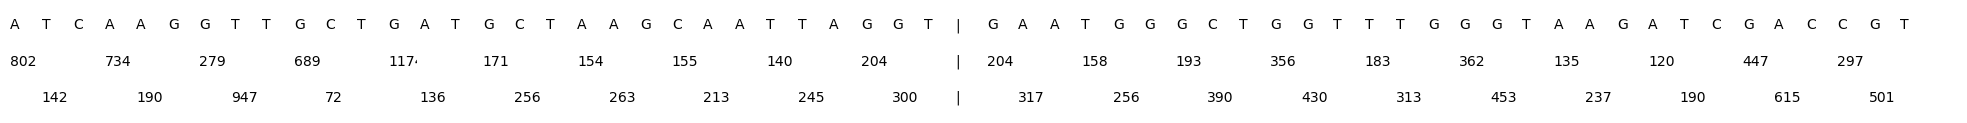

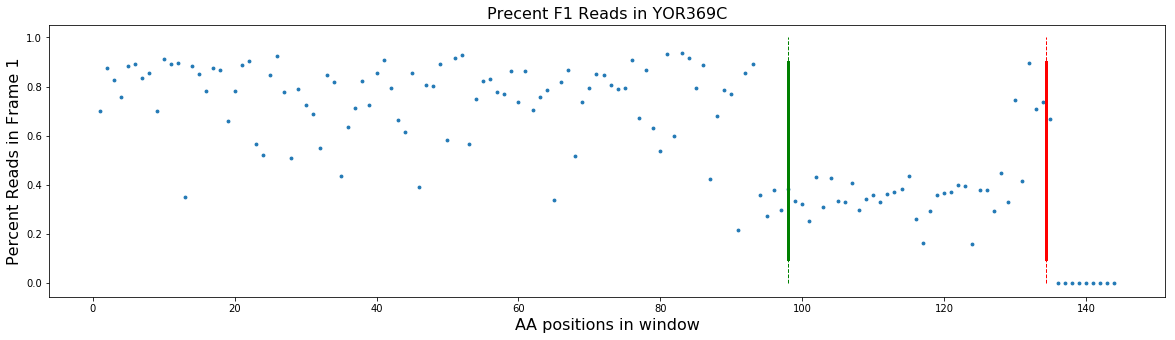


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPL163C	p-value: 9.992929361013054e-13	gene-length: 784	shift-start-position: 615	shift-length 112
Simulated Percent: 0.7


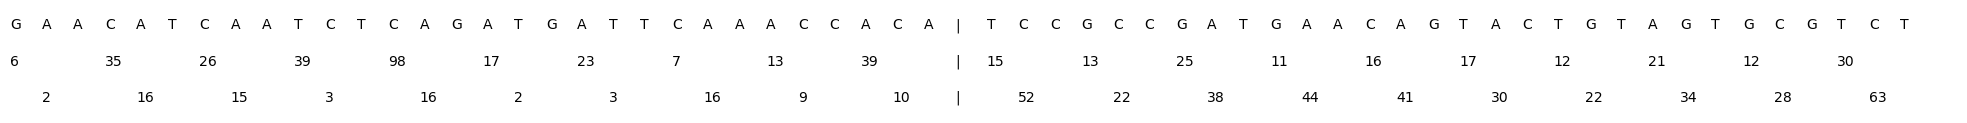

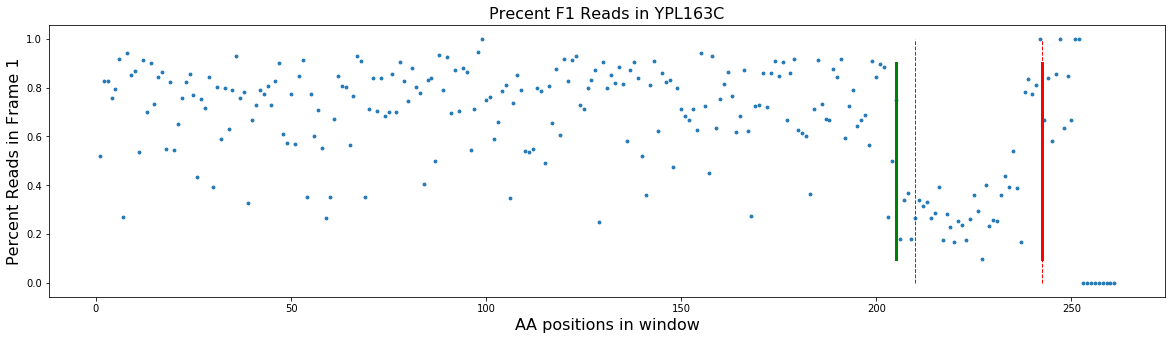


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPL131W	p-value: 2.2061495564357795e-14	gene-length: 895	shift-start-position: 219	shift-length 146
Simulated Percent: 0.8


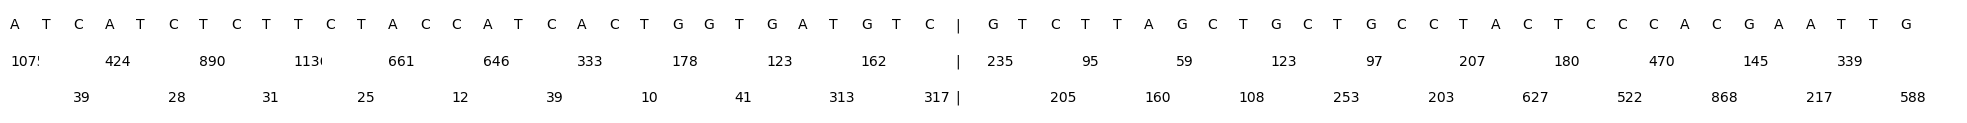

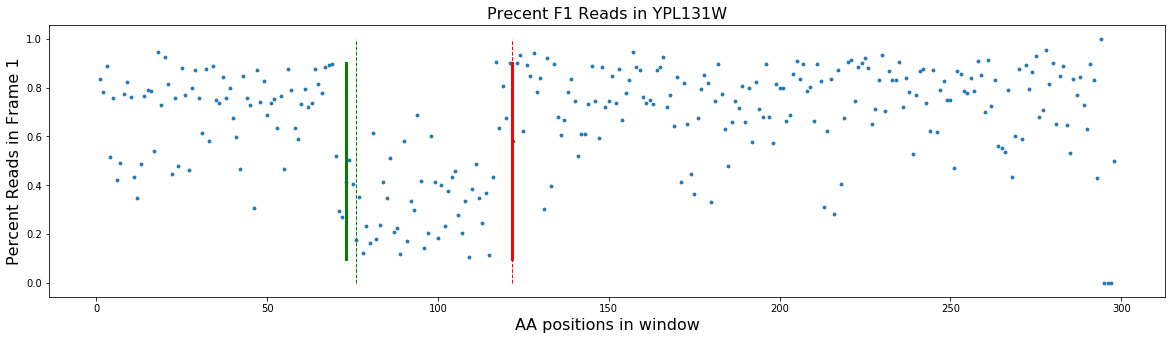


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPR035W	p-value: 1.730242555586848e-07	gene-length: 1114	shift-start-position: 642	shift-length 76
Simulated Percent: 0.9


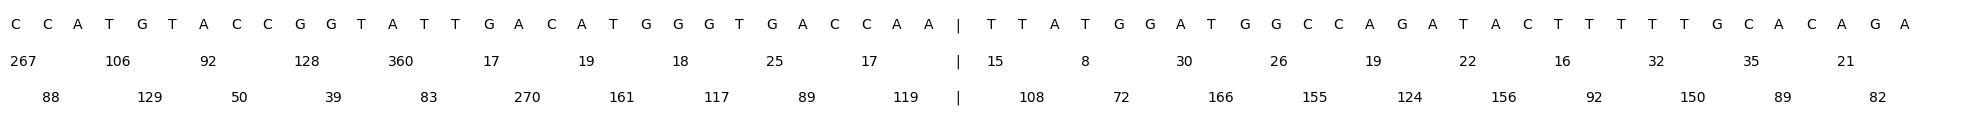

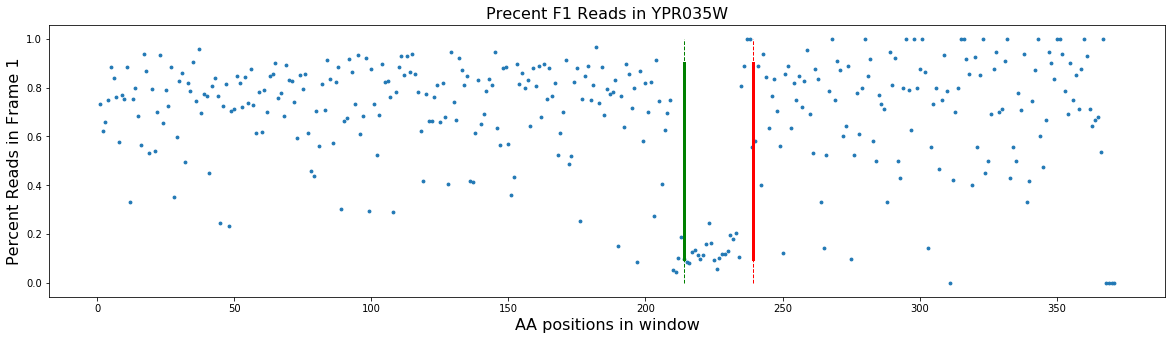


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPR163C	p-value: 3.904922390558173e-27	gene-length: 1312	shift-start-position: 912	shift-length 181
Simulated Percent: 0.8


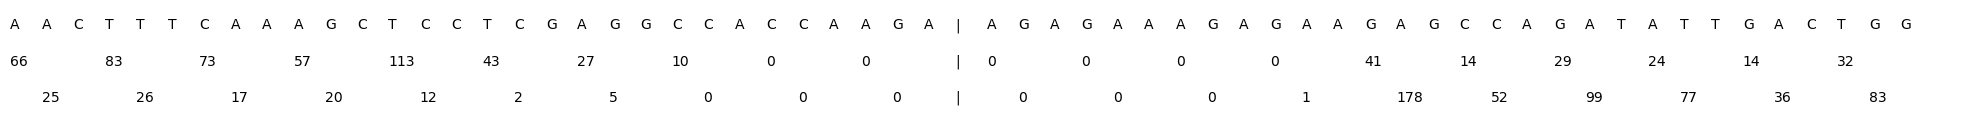

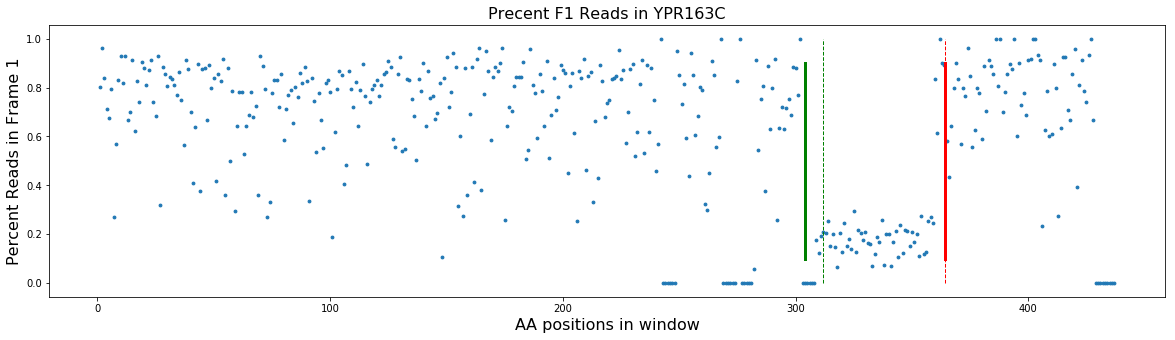


--------------------------------------------------------------------------------------------------------------------------------------------

Gene: YPR183W	p-value: 2.4943873429162402e-05	gene-length: 805	shift-start-position: 567	shift-length 64
Simulated Percent: 0.9


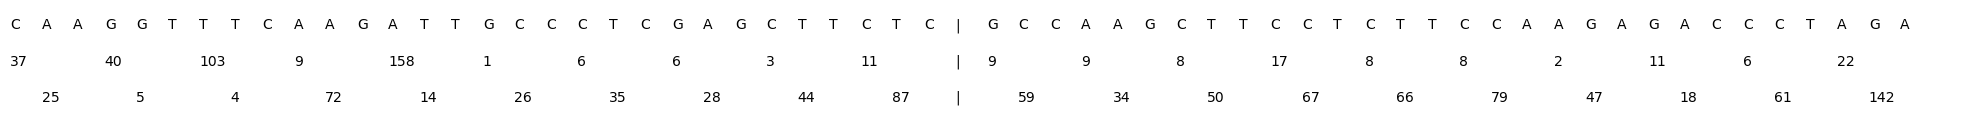

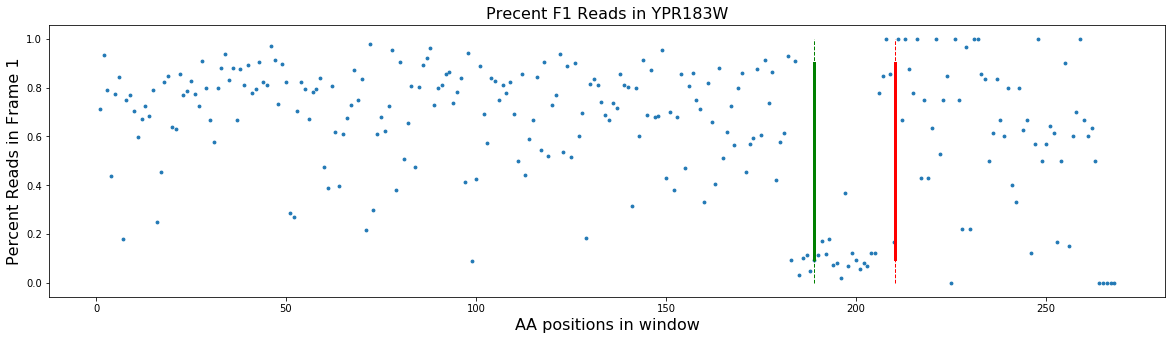


--------------------------------------------------------------------------------------------------------------------------------------------



In [21]:
for gene_name in shift_info_dict:
    if gene_name not in all_info_dict:
        continue
    Info_string = all_info_dict[gene_name]["Info_string"]
    letters = all_info_dict[gene_name]["letters"]
    reads_1 = all_info_dict[gene_name]["read_1"]
    reads_2 = all_info_dict[gene_name]["read_2"]
    percents = all_info_dict[gene_name]["percents"]
        
    print(Info_string)
    print("Simulated Percent: " + str(shift_info_dict[gene_name]["percent"]))
    table_vals = []
    #print(letters)
    #print(reads_1)
    #print(reads_2)
    table_vals.append(letters)
    table_vals.append(reads_1)
    table_vals.append(reads_2)
    
    # Draw table
    plt.figure(1, figsize=(35, 2))
    ax = subplot(111, frame_on=False) 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    the_table = ax.table(cellText=table_vals, cellLoc='left', bbox=(0, 0, 1, 1))
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    for key, cell in the_table.get_celld().items():
        cell.set_linewidth(0)
    plt.show()
    
    xs = [i+1 for i in range(0,len(percents))]
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.scatter(xs, percents, s=8)
    shift = int(Info_string.split("\t")[3].split(" ")[1])/3
    shift_end = shift + int(Info_string.split("\t")[4].split(" ")[1])/3
    #plt.ylim(0.0, 1.0)
    plt.plot([shift, shift], [0.10, 0.9], 'k-', lw=3, c="green")
    real_start = shift_info_dict[gene_name]["shift_start"]/3
    plt.plot([real_start, real_start], [0.0, 1.0], '--', lw=1, c="green")
    plt.plot([shift_end, shift_end], [0.10, 0.9], 'k-', lw=3, c="red")
    real_end = shift_info_dict[gene_name]["shift_end"]/3
    plt.plot([real_end, real_end], [0.0, 1.0], '--', lw=1, c="red")
    #plt.plot([522, 522], [0.0, 1.0], '--', lw=1, c="red")
    ax.autoscale_view()
    plt.title('Precent F1 Reads in ' + gene_name,fontsize=16)
    plt.xlabel('AA positions in window',fontsize=16)
    plt.ylabel('Percent Reads in Frame 1',fontsize=16)
    plt.show()
    print("\n" + '-'*140 + "\n")